# Ford GoBike System Data Analysis:
## Visualization of Bike-Sharing

### Introduction

For this project, I will aim to apply and refine my data analysis and visualization skills using a real-world dataset. Specifically, this analysis will involve exploring data from a bike-sharing system to gain insights into user behavior and trip patterns. I am excited to dive into the data wrangling process, which will include gathering, cleaning, and then visualizing the findings. The ultimate goal is to understand the bike-sharing system's dynamics and present the insights in a meaningful way.

The first step will be to gather the data, which includes trip details such as start and end times, user demographics, and station coordinates. I will then assess the data to identify and correct any quality issues, such as missing values or incorrect data formats. This step is essential to ensure data accuracy and consistency before moving on to analysis. After cleaning, the data will be organized in a format suitable for exploration, allowing me to move on confidently to analysis and visualization.

The questions I aim to answer through this analysis are: What will be the most popular stations for users to start and end their trips? How will different user types utilize the bike-sharing service, and will we see any variation based on demographics like age or gender? Additionally, I am curious to find out whether there will be observable trends in trip durations and the frequency of rides across different days or times of the year. The goal is to uncover interesting patterns in how the bike-sharing system is used and communicate these findings clearly, hopefully providing value for users or stakeholders interested in urban mobility trends.

### Data Gathering

Before I begin data wrangling, I'm going to need to import my relevant libraries.



In [467]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Now, I will extract the project data from the Udacity download.

In [468]:
## Read the Ford GoBike data as a CSV

df_gobike = pd.read_csv('201902-fordgobike-tripdata.csv', parse_dates=['start_time', 'end_time'])
df_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Data Wrangling

In this section, I will familiarize myself with the data and then inspect for duplicates, nulls, or other errant data to be corrected.

In [469]:
df_gobike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


I noticed that the rows are ordered by *end_time* from latest to earliest. I will reverse this order so that the dataframe is ordered by earliest to latest *end_time*.

In [470]:
df_gobike = df_gobike.sort_values(by='end_time')
df_gobike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183412 entries, 183411 to 0
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type            

In [471]:
df_gobike.describe()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183412,183412,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,2019-02-15 21:07:59.090985728,2019-02-15 21:20:05.668533760,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
min,61.000000,2019-02-01 00:00:20.636000,2019-02-01 00:04:52.058000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,2019-02-08 08:31:50.814249984,2019-02-08 08:42:17.385500160,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,2019-02-15 23:05:02.337500160,2019-02-15 23:17:22.168000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,2019-02-22 11:01:16.969750016,2019-02-22 11:14:24.885750016,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,2019-02-28 23:59:18.548000,2019-03-01 08:01:55.975000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000
std,1794.389780,NaN,NaN,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689


In [472]:
# How many duplicates are there in the GoBike data frame
df_gobike.duplicated().sum()

0

There are some problems with the GoBike data that stand out.
1. The columns for *station_latitude* and *station_longitude* are in the float datatype and should be converted to the string datatype for consistency.
2. The *duration_sec* column is harder to understand in it's current state, and would be more easily readible if seconds were converted to minutes.
3. The columns *user_type*, *member_gender*, and *bike_share_for_all_trip* are all the string datatype, but it appears that there are only a few unique values for each column. They should be converted to the categorical datatype.
4. Both the *member_gender* and *member_birth_year* columns have exactly 8265 null entries. I will determine if these rows should be removed.
5. The *station_id* and *station_name* columns have exactly 197 null entries. I will determine if these rows should be removed.
6. The *start_time* and *end_time* columns need to be converted to the datetime datatype.
7. The *member_birth_year* and *station_id* columns are incorrectly assigned the float datatype due to missing values. I will need to either remove or fill in the missing values so I can convert these columns to the int datatype.

In summary, several data issues will be addressed to prepare the dataset for analysis. These include converting datatypes for consistency (e.g., station coordinates to strings, duration from seconds to minutes, and user attributes to categorical types), addressing missing values in columns like *member_gender*, *member_birth_year*, *station_id*, and *station_name*, and converting columns such as *start_time*, *end_time*, *member_birth_year*, and *station_id* to their appropriate datatypes after handling missing data.

### Data Cleaning

To begin the data cleaning, I will convert the *station_latitude* and *station_longitude* columns from float to string datatype to ensure consistency when handling coordinate data.

In [473]:
df_gobike['start_station_latitude'] = df_gobike['start_station_latitude'].astype(str)
df_gobike['start_station_longitude'] = df_gobike['start_station_longitude'].astype(str)
df_gobike['end_station_latitude'] = df_gobike['end_station_latitude'].astype(str)
df_gobike['end_station_longitude'] = df_gobike['end_station_longitude'].astype(str)

df_gobike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183412 entries, 183411 to 0
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  object        
 6   start_station_longitude  183412 non-null  object        
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  object        
 10  end_station_longitude    183412 non-null  object        
 11  bike_id                  183412 non-null  int64         
 12  user_type            

Next, I will convert the *start_time* and *end_time* columns to datetime format to ensure readability of time-related data, and to simplify future visualizations.

In [474]:
# Convert columns to datetime format
df_gobike['start_time'] = pd.to_datetime(df_gobike['start_time'])
df_gobike['end_time'] = pd.to_datetime(df_gobike['end_time'])

Next, I will determine whether or not to drop rows with null values in the *member_gender* and *member_birth_year* columns. I need to confirm whether the rows missing data in *member_gender* are the exact same rows missing data in *member_birth_year*.

In [475]:
df_gobike[df_gobike['member_gender'].isna() & df_gobike['member_birth_year'].notna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


Since I can confirm that all entries missing *member_gender* also are missing *member_birth_year*, I will delete these rows.

Here, I will fill the *member_birth_year*, *start_station_id*, and *end_station_id* columns with an appropriate value (e.g., 0), so that these columns can be converted to integer type to ensure consistency in data representation.

In [476]:
# Drop rows with missing member_birth_year and member_gender
df_gobike.dropna(subset=['member_birth_year'], inplace=True)
df_gobike.dropna(subset=['member_gender'], inplace=True)

df_gobike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175147 entries, 183411 to 0
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  object        
 6   start_station_longitude  175147 non-null  object        
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  object        
 10  end_station_longitude    175147 non-null  object        
 11  bike_id                  175147 non-null  int64         
 12  user_type            

Next, I will determine the same for the *station_name* and *station_id* columns to see if each contain missing rows with the exact same missing data.

In [477]:
df_gobike.loc[df_gobike['start_station_name'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
181201,312,2019-02-01 09:26:34.803,2019-02-01 09:31:46.921,NaN,NaN,37.4,-121.93,NaN,NaN,37.4,-121.93,4208,Subscriber,1987.0,Male,No
180106,2013,2019-02-01 11:33:55.147,2019-02-01 12:07:28.940,NaN,NaN,37.4,-121.94,NaN,NaN,37.4,-121.94,4251,Customer,1990.0,Female,No
179970,659,2019-02-01 12:17:37.675,2019-02-01 12:28:37.014,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
179730,309,2019-02-01 12:59:45.969,2019-02-01 13:04:55.426,NaN,NaN,37.4,-121.94,NaN,NaN,37.4,-121.93,4249,Customer,1987.0,Female,No
176154,1447,2019-02-02 12:03:04.544,2019-02-02 12:27:12.267,NaN,NaN,37.4,-121.93,NaN,NaN,37.4,-121.93,4249,Customer,1984.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,509,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,NaN,NaN,37.4,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
4070,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.4,-121.92,4089,Subscriber,1984.0,Male,Yes
3625,142,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
1733,1272,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,NaN,NaN,37.4,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No


In [478]:
df_gobike[['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name']].isna().all(axis=1).sum()

195

Since it appears that these four columns all contain the same rows with missing data, I will also delete these rows.

In [479]:
df_gobike = df_gobike.dropna(subset=['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'], how='all')

df_gobike[['start_station_id']].isna().all(axis=1).sum()

0

In [480]:
df_gobike[['start_station_name']].isna().all(axis=1).sum()

0

In [481]:
df_gobike[['end_station_id']].isna().all(axis=1).sum()

0

In [482]:
df_gobike[['end_station_name']].isna().all(axis=1).sum()

0

With the rows of missing data deleted for *member_birth_year*, *start_station_id*, and *end_station_id*, I will convert the columns from float to int dataypes.

In [483]:
# Convert to integer type
df_gobike['member_birth_year'] = df_gobike['member_birth_year'].astype('Int64')
df_gobike['start_station_id'] = df_gobike['start_station_id'].astype('Int64')
df_gobike['end_station_id'] = df_gobike['end_station_id'].astype('Int64')

Up next, the trip duration will be converted from seconds to minutes in a new column named *duration_min* to improve readability, and the original *duration_sec* column will be removed to keep the dataset concise.

In [484]:
# Convert duration from seconds to minutes
df_gobike['duration_min'] = df_gobike['duration_sec'] / 60

# Remove the original duration_sec column
df_gobike = df_gobike.drop(['duration_sec'], axis=1)

df_gobike.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
183411,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24,Spear St at Folsom St,37.7896767,-122.3904285,37,2nd St at Folsom St,37.78499972833808,-122.39593561749642,1057,Subscriber,1989,Male,No,4.516667
183410,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.8113514,-122.2734217,216,San Pablo Ave at 27th St,37.8178269,-122.2756976,5095,Subscriber,1988,Male,No,2.316667
183409,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.3319323,-121.9048882,277,Morrison Ave at Julian St,37.3336577,-121.9085859,3824,Subscriber,1990,Male,Yes,2.350000
183408,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.7896254,-122.400811,66,3rd St at Townsend St,37.77874161153677,-122.39274082710836,4960,Subscriber,1984,Male,No,5.216667
183407,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.7880593,-122.3918648,324,Union Square (Powell St at Post St),37.788299978150825,-122.40853071212769,4832,Subscriber,1996,Male,No,8.000000


Here, I will determine the number of unique values in the *user_type*, *member_gender*, and *bike_share_for_all_trip* columns to determine if they should be assigned the category datatype.

In [485]:
print(df_gobike['user_type'].unique())
print(df_gobike['member_gender'].unique())
print(df_gobike['bike_share_for_all_trip'].unique())

['Subscriber' 'Customer']
['Male' 'Other' 'Female']
['No' 'Yes']


Since there are no more than three unique values in each of these columns, I will assign them the category datatype.

In [486]:
# Convert categorical columns to 'category' datatype
df_gobike['user_type'] = df_gobike['user_type'].astype('category')
df_gobike['member_gender'] = df_gobike['member_gender'].astype('category')
df_gobike['bike_share_for_all_trip'] = df_gobike['bike_share_for_all_trip'].astype('category')

df_gobike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 183411 to 0
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  Int64         
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  object        
 5   start_station_longitude  174952 non-null  object        
 6   end_station_id           174952 non-null  Int64         
 7   end_station_name         174952 non-null  object        
 8   end_station_latitude     174952 non-null  object        
 9   end_station_longitude    174952 non-null  object        
 10  bike_id                  174952 non-null  int64         
 11  user_type                174952 non-null  category      
 12  member_birth_year    

Before moving on to the data visualization portion of the project, I will make some additional adjustments to the dataframe. First, the *member_birth_year* column will be used to calculate the member's age, which will then be stored in a new *member_age* column. The original *member_birth_year* column will be removed to simplify the dataset.

In [487]:
# Convert birth year to age and remove the original column
df_gobike['member_age'] = (2019-df_gobike['member_birth_year']).astype(int)
df_gobike.drop(columns=['member_birth_year'], inplace=True)

df_gobike.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,member_age
183411,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24,Spear St at Folsom St,37.7896767,-122.3904285,37,2nd St at Folsom St,37.78499972833808,-122.39593561749642,1057,Subscriber,Male,No,4.516667,30
183410,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.8113514,-122.2734217,216,San Pablo Ave at 27th St,37.8178269,-122.2756976,5095,Subscriber,Male,No,2.316667,31
183409,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.3319323,-121.9048882,277,Morrison Ave at Julian St,37.3336577,-121.9085859,3824,Subscriber,Male,Yes,2.350000,29
183408,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.7896254,-122.400811,66,3rd St at Townsend St,37.77874161153677,-122.39274082710836,4960,Subscriber,Male,No,5.216667,35
183407,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.7880593,-122.3918648,324,Union Square (Powell St at Post St),37.788299978150825,-122.40853071212769,4832,Subscriber,Male,No,8.000000,23


To verify the legitimacy of the new column, I will perform a quick percentile analysis of the *member_age* column to determine if there are any outliers in the age range.

In [488]:
df_gobike[['member_age']].describe(percentiles=[.05, .25, .5, .75, .999])

,member_age
count,174952.000000
mean,34.196865
std,10.118731
min,18.000000
5%,22.000000
25%,27.000000
50%,32.000000
75%,39.000000
99.9%,86.000000
max,141.000000


There are some outliers in the age column, as shown by the max of 141 which exceeds the age of the longest living known person in the world (116 years old). The member age will be restricted to a reasonable range between 18 and 86 to account for any outliers or incorrect values.

In [489]:
# Restrict the member age values to the 99.9 percentile of age value
df_gobike['member_age'] = np.clip(df_gobike['member_age'], 18, 86)

df_gobike[['member_age']].describe(percentiles=[.05, .25, .5, .75, .999])

,member_age
count,174952.000000
mean,34.182056
std,10.020131
min,18.000000
5%,22.000000
25%,27.000000
50%,32.000000
75%,39.000000
99.9%,86.000000
max,86.000000


Lastly, I will combine the values in the *start_coordinates* and *end_coordinates* columns into coordinate strings to facilitate easy reference and visualization of station locations in the format `latitude:longitude`.

In [490]:
# Combine latitude and longitude into coordinate strings for start and end locations
df_gobike['start_coordinates'] = (df_gobike['start_station_latitude'].str.strip() + ', ' +
                               df_gobike['start_station_longitude'].str.strip())
df_gobike['end_coordinates'] = (df_gobike['end_station_latitude'].str.strip() + ', ' + 
                             df_gobike['end_station_longitude'].str.strip())

df_gobike.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,member_age,start_coordinates,end_coordinates
183411,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24,Spear St at Folsom St,37.7896767,-122.3904285,37,2nd St at Folsom St,37.78499972833808,-122.39593561749642,1057,Subscriber,Male,No,4.516667,30,"37.7896767, -122.3904285","37.78499972833808, -122.39593561749642"
183410,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.8113514,-122.2734217,216,San Pablo Ave at 27th St,37.8178269,-122.2756976,5095,Subscriber,Male,No,2.316667,31,"37.8113514, -122.2734217","37.8178269, -122.2756976"
183409,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.3319323,-121.9048882,277,Morrison Ave at Julian St,37.3336577,-121.9085859,3824,Subscriber,Male,Yes,2.350000,29,"37.3319323, -121.9048882","37.3336577, -121.9085859"
183408,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.7896254,-122.400811,66,3rd St at Townsend St,37.77874161153677,-122.39274082710836,4960,Subscriber,Male,No,5.216667,35,"37.7896254, -122.400811","37.77874161153677, -122.39274082710836"
183407,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.7880593,-122.3918648,324,Union Square (Powell St at Post St),37.788299978150825,-122.40853071212769,4832,Subscriber,Male,No,8.000000,23,"37.7880593, -122.3918648","37.788299978150825, -122.40853071212769"


In [491]:
# Store the clean dataframe in a CSV file named 201902_gobike_master.csv
df_gobike.to_csv('201902_gobike_master.csv')

### Data Visualization

Here, I am to use visualzations to answer the following questions:
1. How do the different user types vary across genders, and are there any notable trends?
2. How does the percentage of users who share bikes for all trips vary by gender?
3. Which days of the week see the most rides, and how does this change across user types?
4. Is there a significant difference in the duration of rides based on the age group of the riders?
5. What is the distribution of trip durations, and do round trips differ significantly in duration compared to one-way trips?

I will start first by calculating the percentage of user types by gender using a bar chart to provide insights into the distribution of Subscribers and Customers across genders. This will help in understanding how different user types are distributed among male, female, and other genders, potentially revealing usage patterns.

C:\Users\pccra\AppData\Local\Temp\ipykernel_50044\2770419803.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df_gobike.groupby(['member_gender', 'user_type']).size().reset_index(name='count')
C:\Users\pccra\AppData\Local\Temp\ipykernel_50044\2770419803.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot['percentage'] = (df_plot['count'] / df_plot.groupby('member_gender')['count'].transform('sum')) * 100


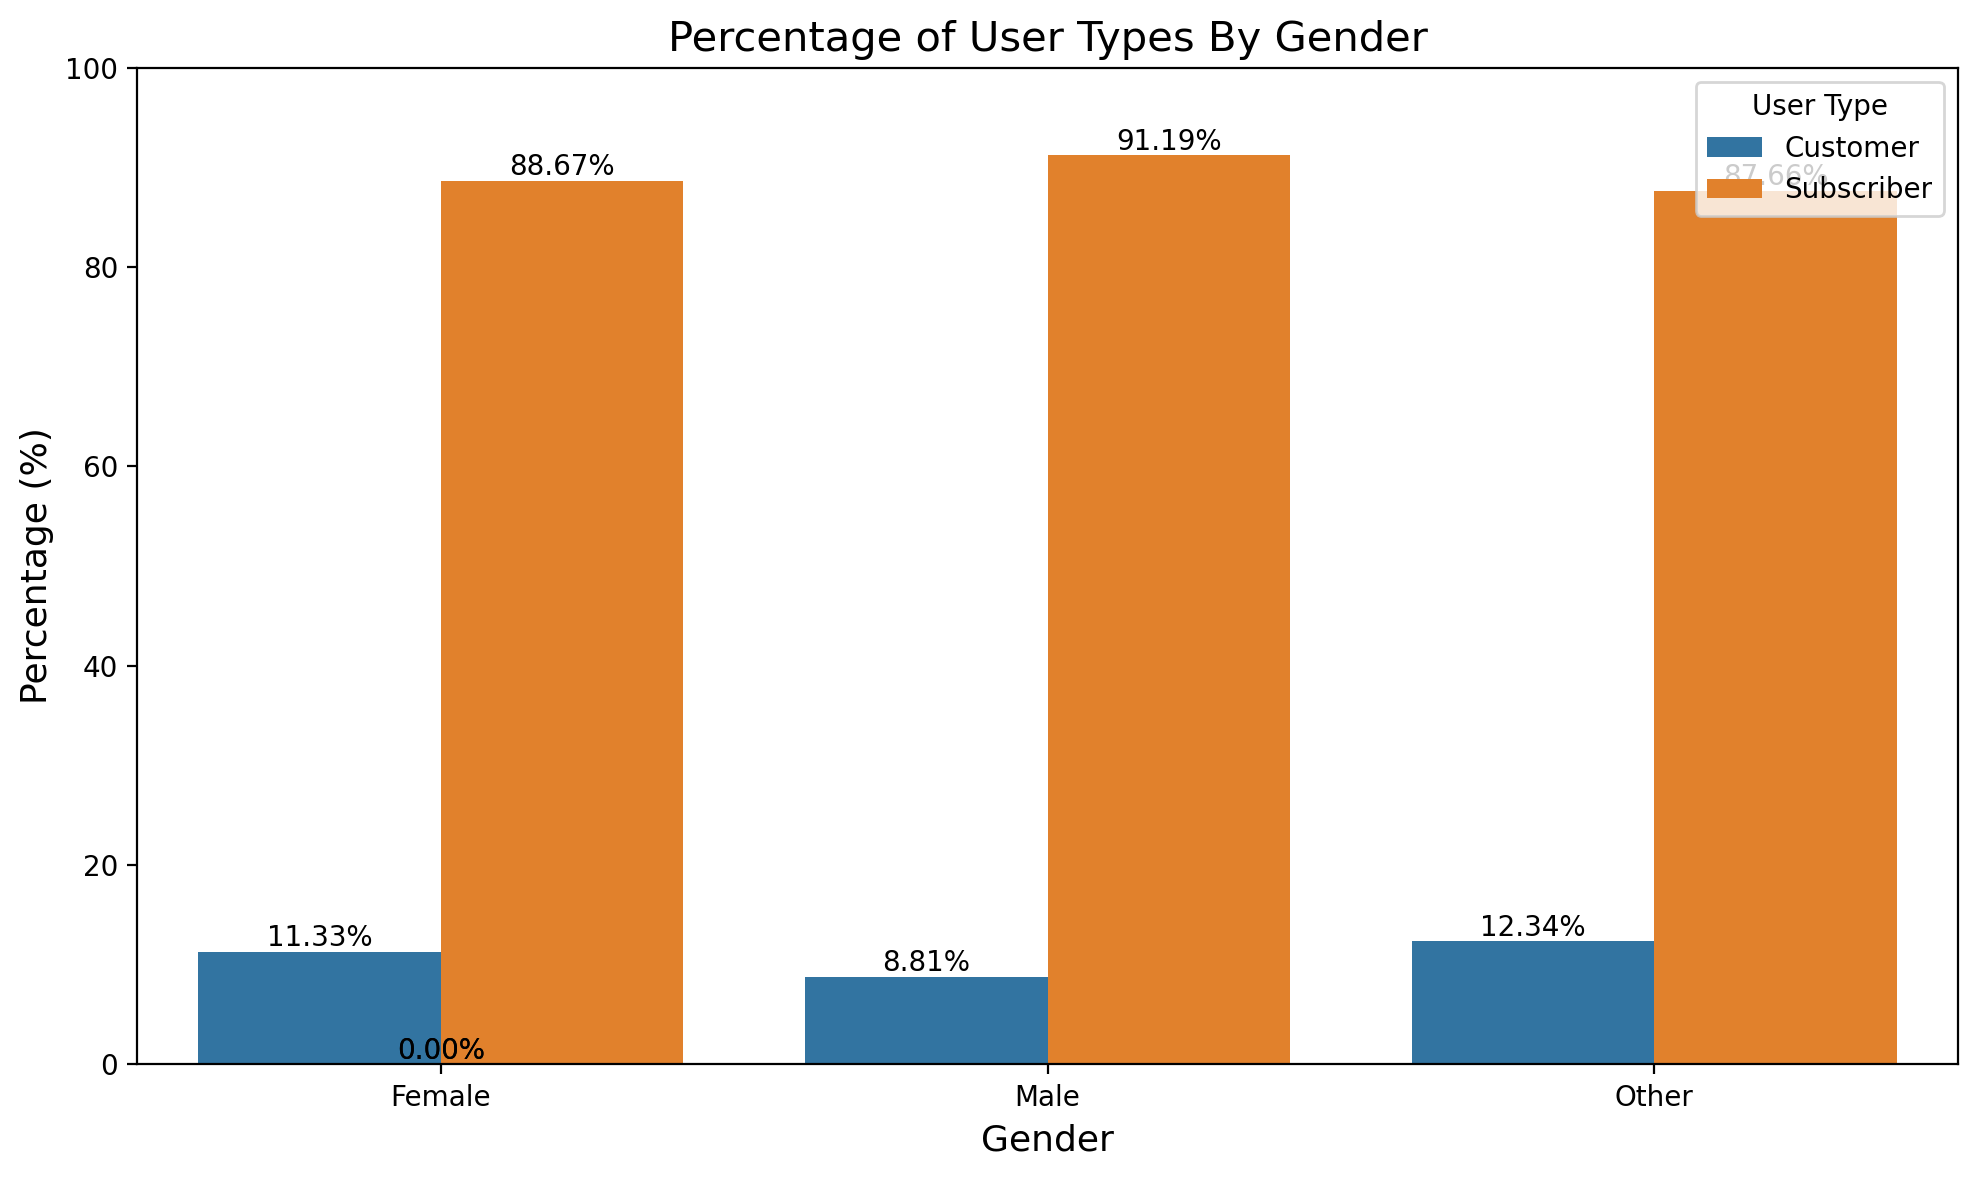

In [492]:
# Calculate the percentage of user types by gender
df_plot = df_gobike.groupby(['member_gender', 'user_type']).size().reset_index(name='count')
df_plot['percentage'] = (df_plot['count'] / df_plot.groupby('member_gender')['count'].transform('sum')) * 100

# Plotting the percentage of user types by gender
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_plot, x='member_gender', hue='user_type', y='percentage', ax=ax)

# Adding value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xlabel('Gender', fontsize=13)
ax.set_ylabel('Percentage (%)', fontsize=13)
ax.set_ylim(0, 100)
ax.set_title('Percentage of User Types By Gender', fontsize=15)
ax.legend(title='User Type', loc='upper right')

plt.tight_layout()
plt.show()

The bar chart shows that a higher percentage of subscribers are male compared to female, while the proportion of customers is relatively balanced between genders. This indicates that males are more slightly more likely than females to subscribe to the bike-sharing service.

Next, I will visualize the distributions of the categorical features *user_type*, *member_gender*, and *bike_share_for_all_trip* using bar charts to provide insights into how these categories are represented within the dataset. This will help in understanding the overall user demographics and preferences, including gender distribution, user type, and bike-sharing habits.

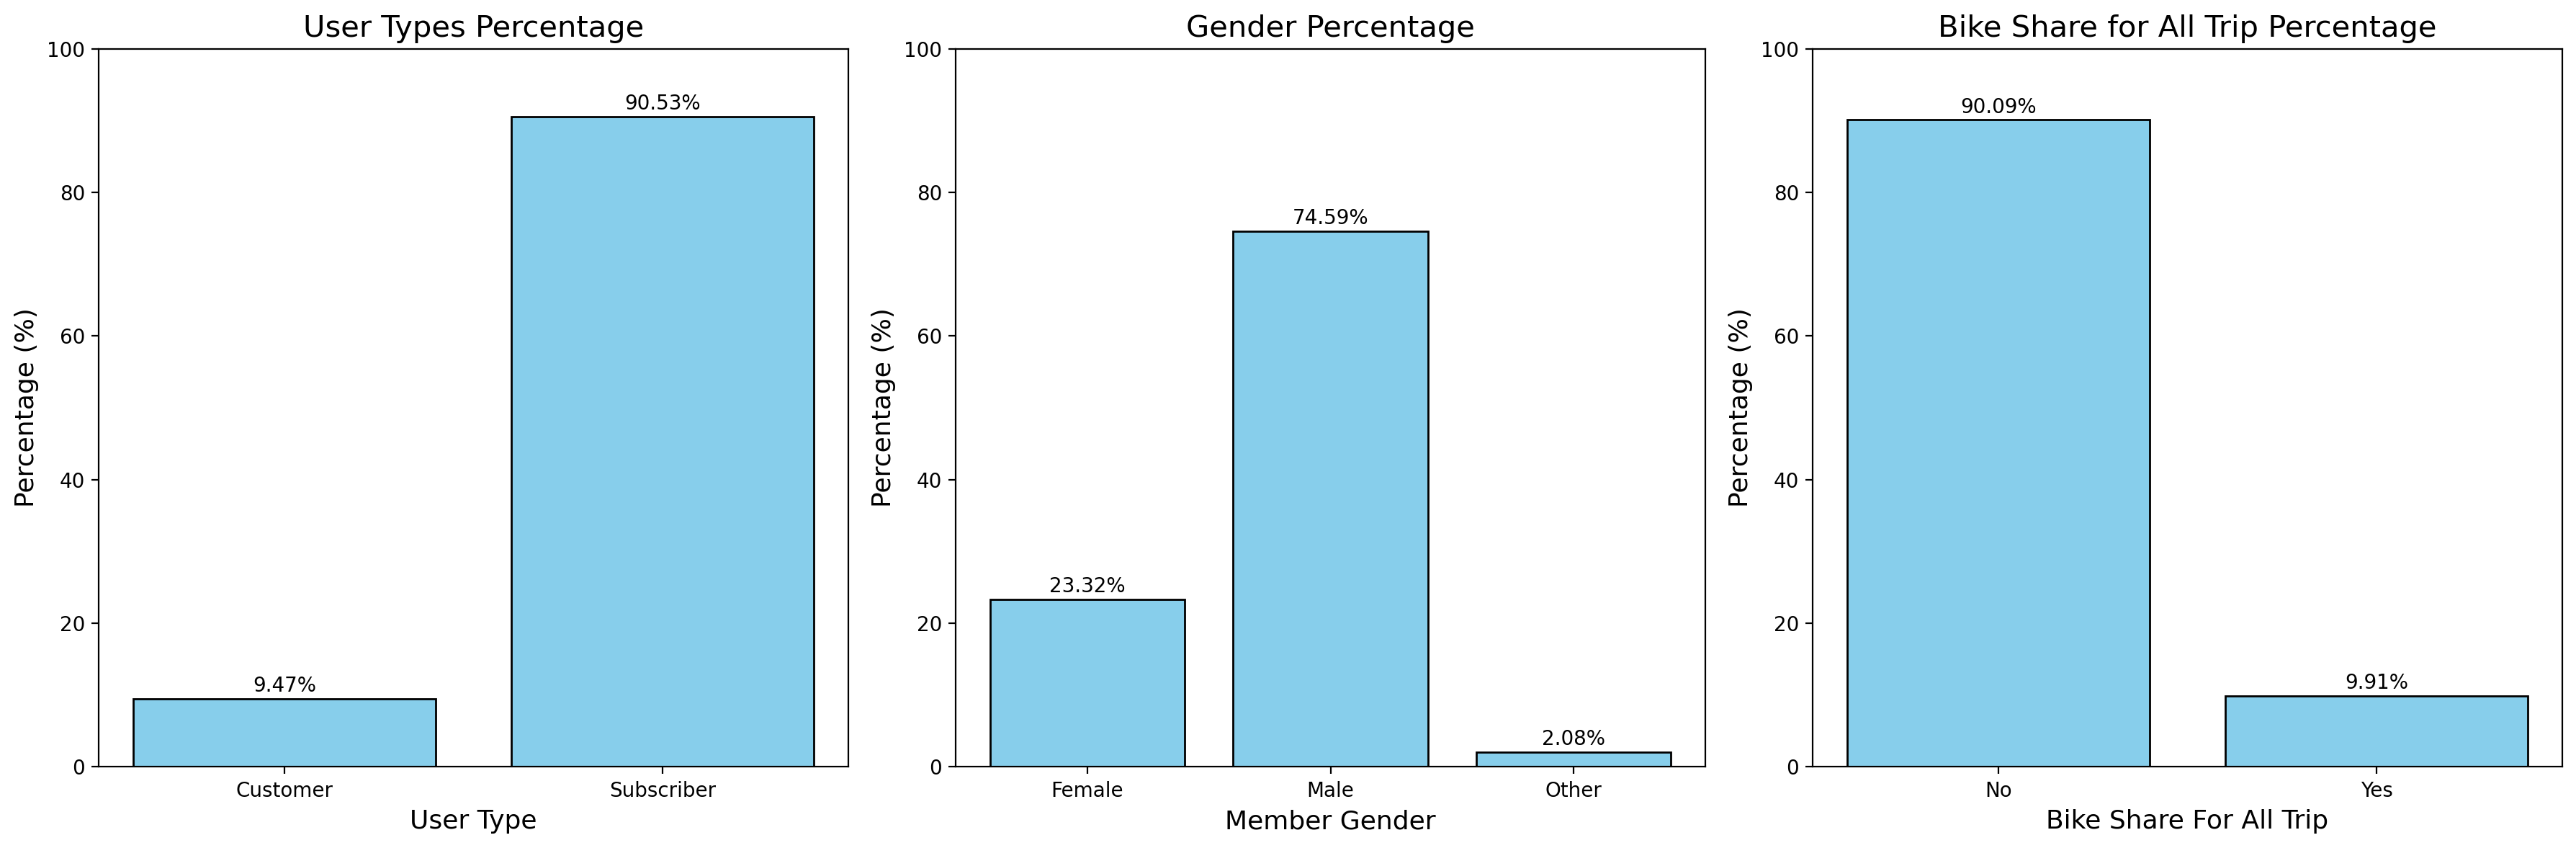

In [493]:
# Define columns and titles
columns = ['user_type', 'member_gender', 'bike_share_for_all_trip']
titles = ['User Types Percentage', 'Gender Percentage', 'Bike Share for All Trip Percentage']

# Create subplots for each categorical feature
fig, axes = plt.subplots(1, 3, sharey=False, figsize=(18, 6))
for col, title, ax in zip(columns, titles, axes):
    # Calculate percentage for each category
    category_percentage = df_gobike[col].value_counts(normalize=True, dropna=False).sort_index() * 100
    # Plotting the bar chart
    ax.bar(category_percentage.index, category_percentage.values, color='skyblue', edgecolor='black')
    ax.set_ylim(0, 100)
    ax.set_ylabel('Percentage (%)', fontsize=13)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(col.replace('_', ' ').title(), fontsize=13)

    # Adding value labels on bars
    for i, v in enumerate(category_percentage.values):
        ax.text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

The bar charts show that the majority of users are Subscribers, males make up the largest percentage of riders, and most users do not share bikes for all trips. These visualizations indicate that subscribers are the dominant user type, and there are differences in bike-sharing habits across different genders.

Looking into age, I will visualize the distribution of member ages, showing how the ages are spread across the user base. This will help identify any age-related trends or clusters within the dataset.

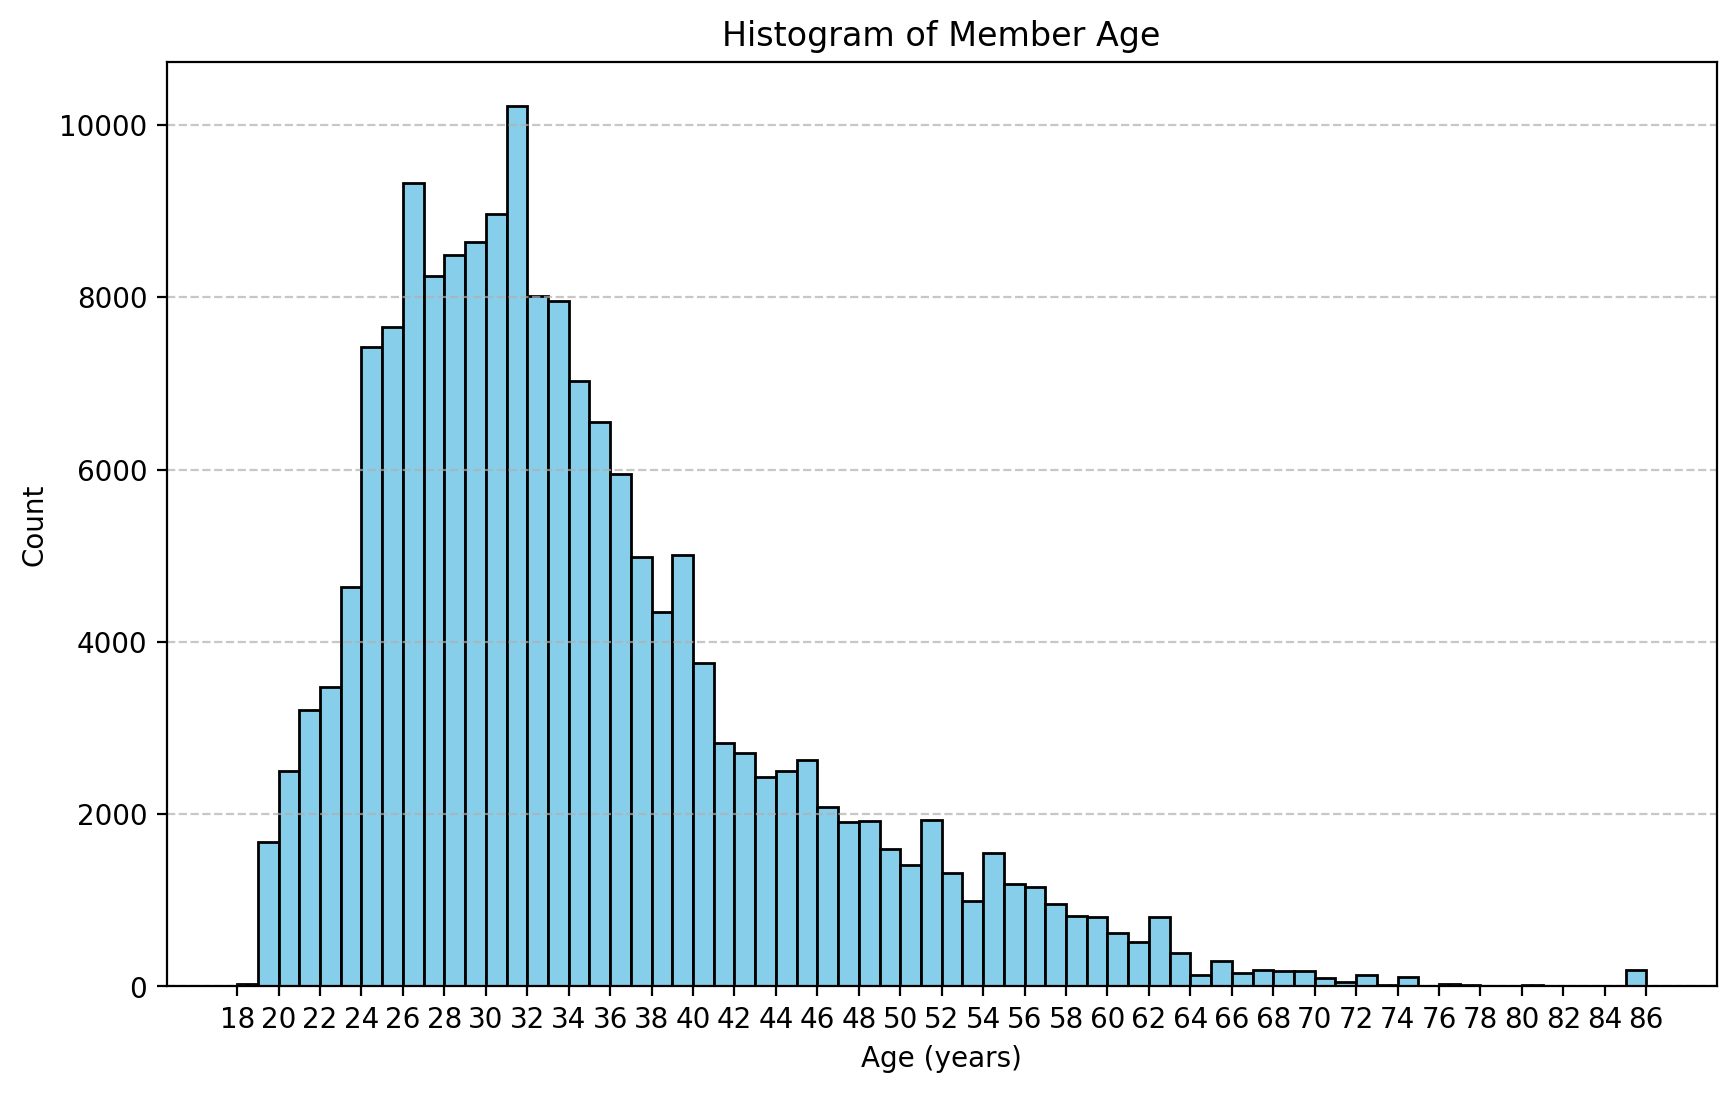

In [494]:
plt.figure(figsize=(10, 6))
plt.hist(df_gobike['member_age'], bins=range(df_gobike['member_age'].min(), df_gobike['member_age'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Histogram of Member Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.xticks(range(df_gobike['member_age'].min(), df_gobike['member_age'].max() + 1, 2))  # Set x-axis ticks every 2 years
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The histogram indicates the most common age ranges among users, with a concentration in younger to middle-aged groups. Specifically, the age groups conisistently over 6000 rides are between 24 and 36 years old.

For the next graph, I will define and calculate age groups to determine the distribution of users across different age ranges in order to understand which age groups are most represented in the dataset and identify potential clusters or trends.

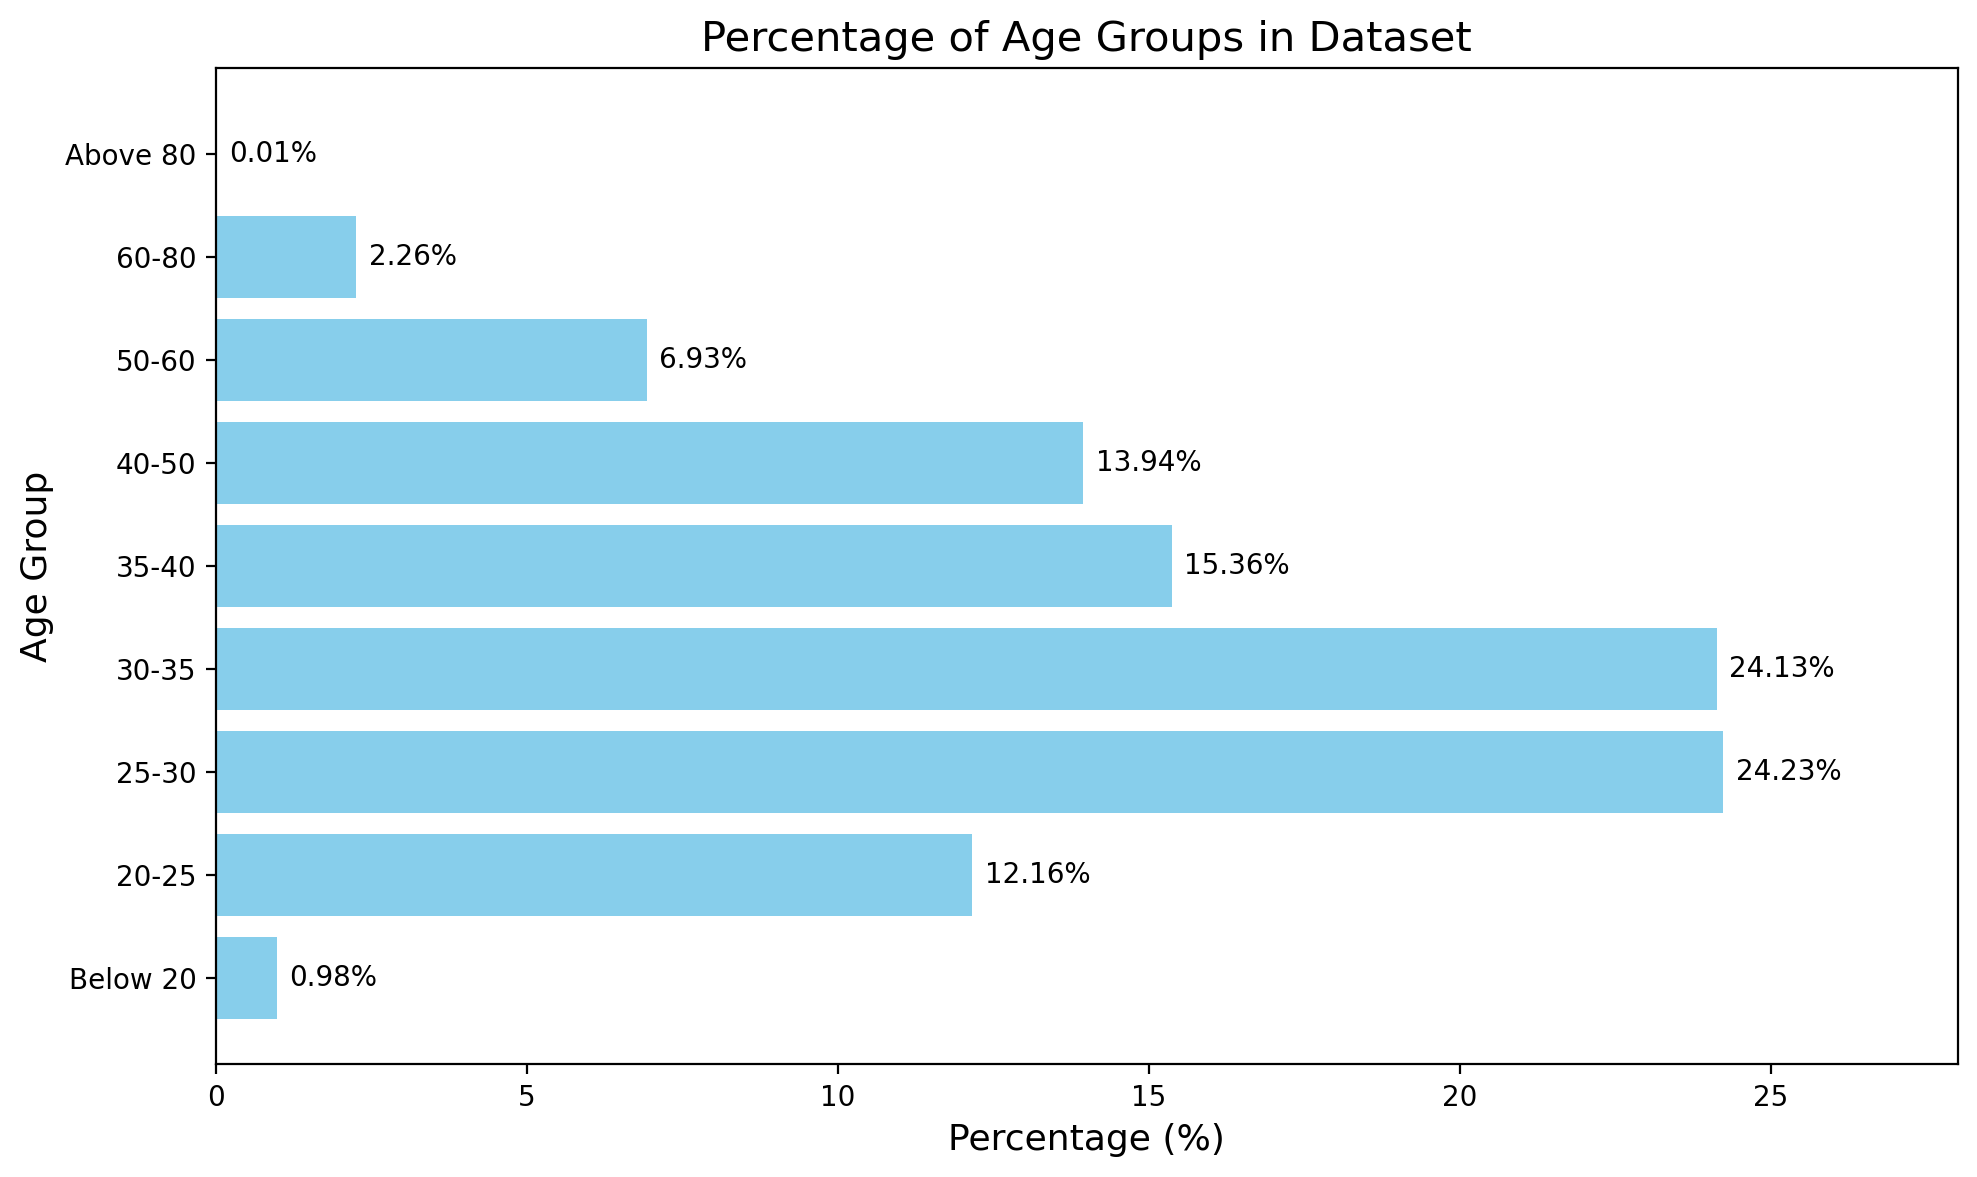

In [495]:
# Define age bins and labels
min_age = df_gobike['member_age'].min()
max_age = df_gobike['member_age'].max()
bins = [min_age, 20, 25, 30, 35, 40, 50, 60, 80, max_age]
labels = ["Below 20", "20-25", "25-30", "30-35", "35-40", "40-50", "50-60", "60-80", "Above 80"]

# Create age groups
df_gobike['age_group'] = pd.cut(df_gobike['member_age'], bins=bins, right=False, labels=labels)

# Calculate the percentage of each age group
age_group_percentage = df_gobike['age_group'].value_counts(normalize=True).sort_index() * 100

# Plotting the age group percentages as a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(age_group_percentage.index, age_group_percentage.values, color='skyblue')
ax.set_xlim(0, 28)
ax.set_xlabel('Percentage (%)', fontsize=13)
ax.set_ylabel('Age Group', fontsize=13)
ax.set_title('Percentage of Age Groups in Dataset', fontsize=15)

# Adding value labels on bars
for i, v in enumerate(age_group_percentage.values):
    ax.text(v + 0.2, i, f'{v:.2f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

The resulting horizontal bar chart highlights the proportion of users in each age group, with certain age ranges showing higher representation, specifically age ranges 25-30 and 30-35. 

Continuing on age analysis, I will now visualize the distribution of member age by gender using a box plot to help understand how age varies across different genders. This visualization will provide insights into the range, median, and any outliers present for each gender.

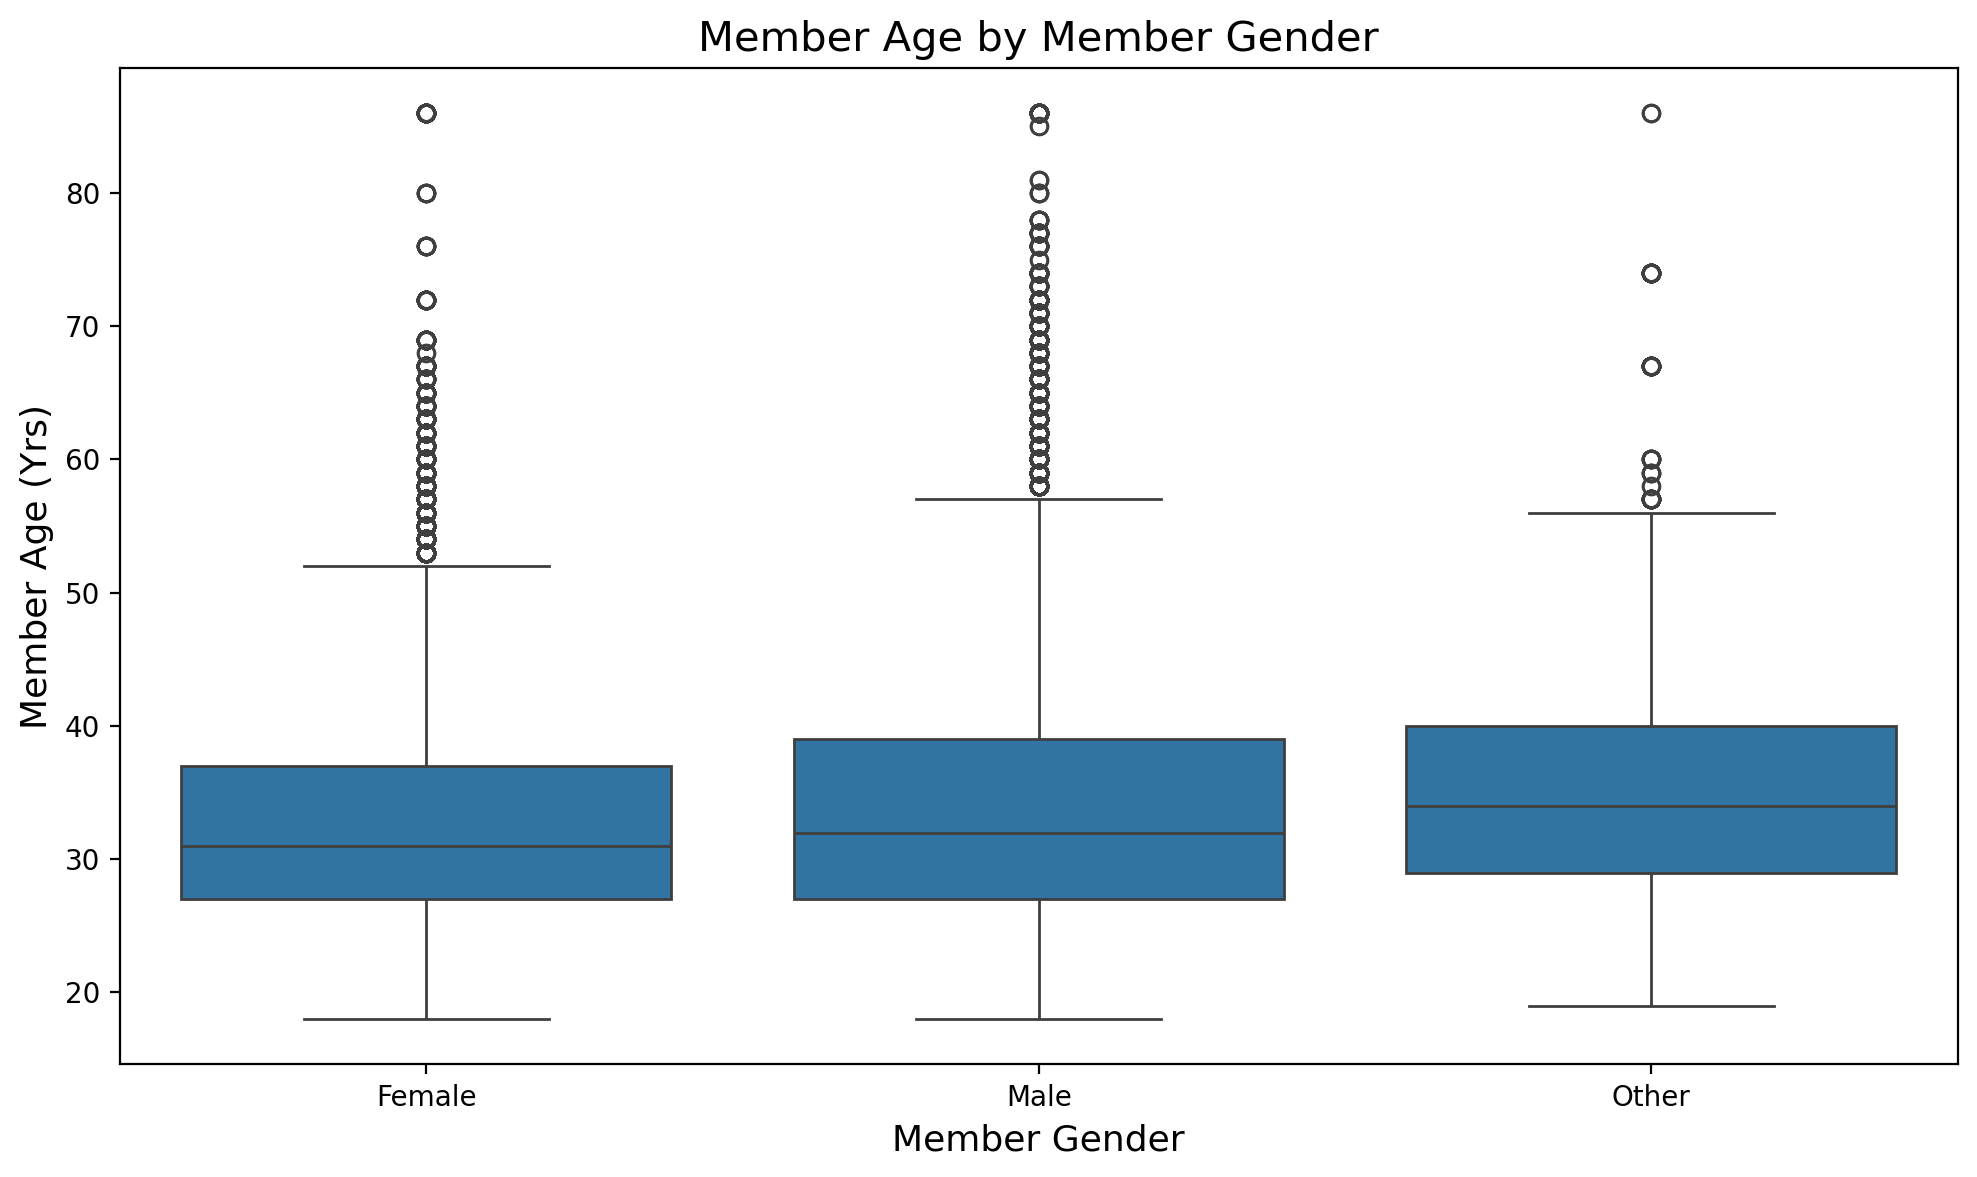

In [496]:
# Set the color palette
color = sns.color_palette()[0]

# Plotting the box plot for member age by member gender
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_gobike, x='member_gender', y='member_age', color=color, ax=ax)
ax.set_title('Member Age by Member Gender', fontsize=15)
ax.set_xlabel('Member Gender', fontsize=13)
ax.set_ylabel('Member Age (Yrs)', fontsize=13)

plt.tight_layout()
plt.show()

The box plot reveals that the age distribution for males and females is similar, but males show a slightly wider range of ages. Additionally, there are very few riders over the age of 55 for both males and females.

Using a different method of visualization (violin plot), I will attempt to provide additional insights into how ages are distributed for each gender, including key statistics like the quartiles and overall spread.

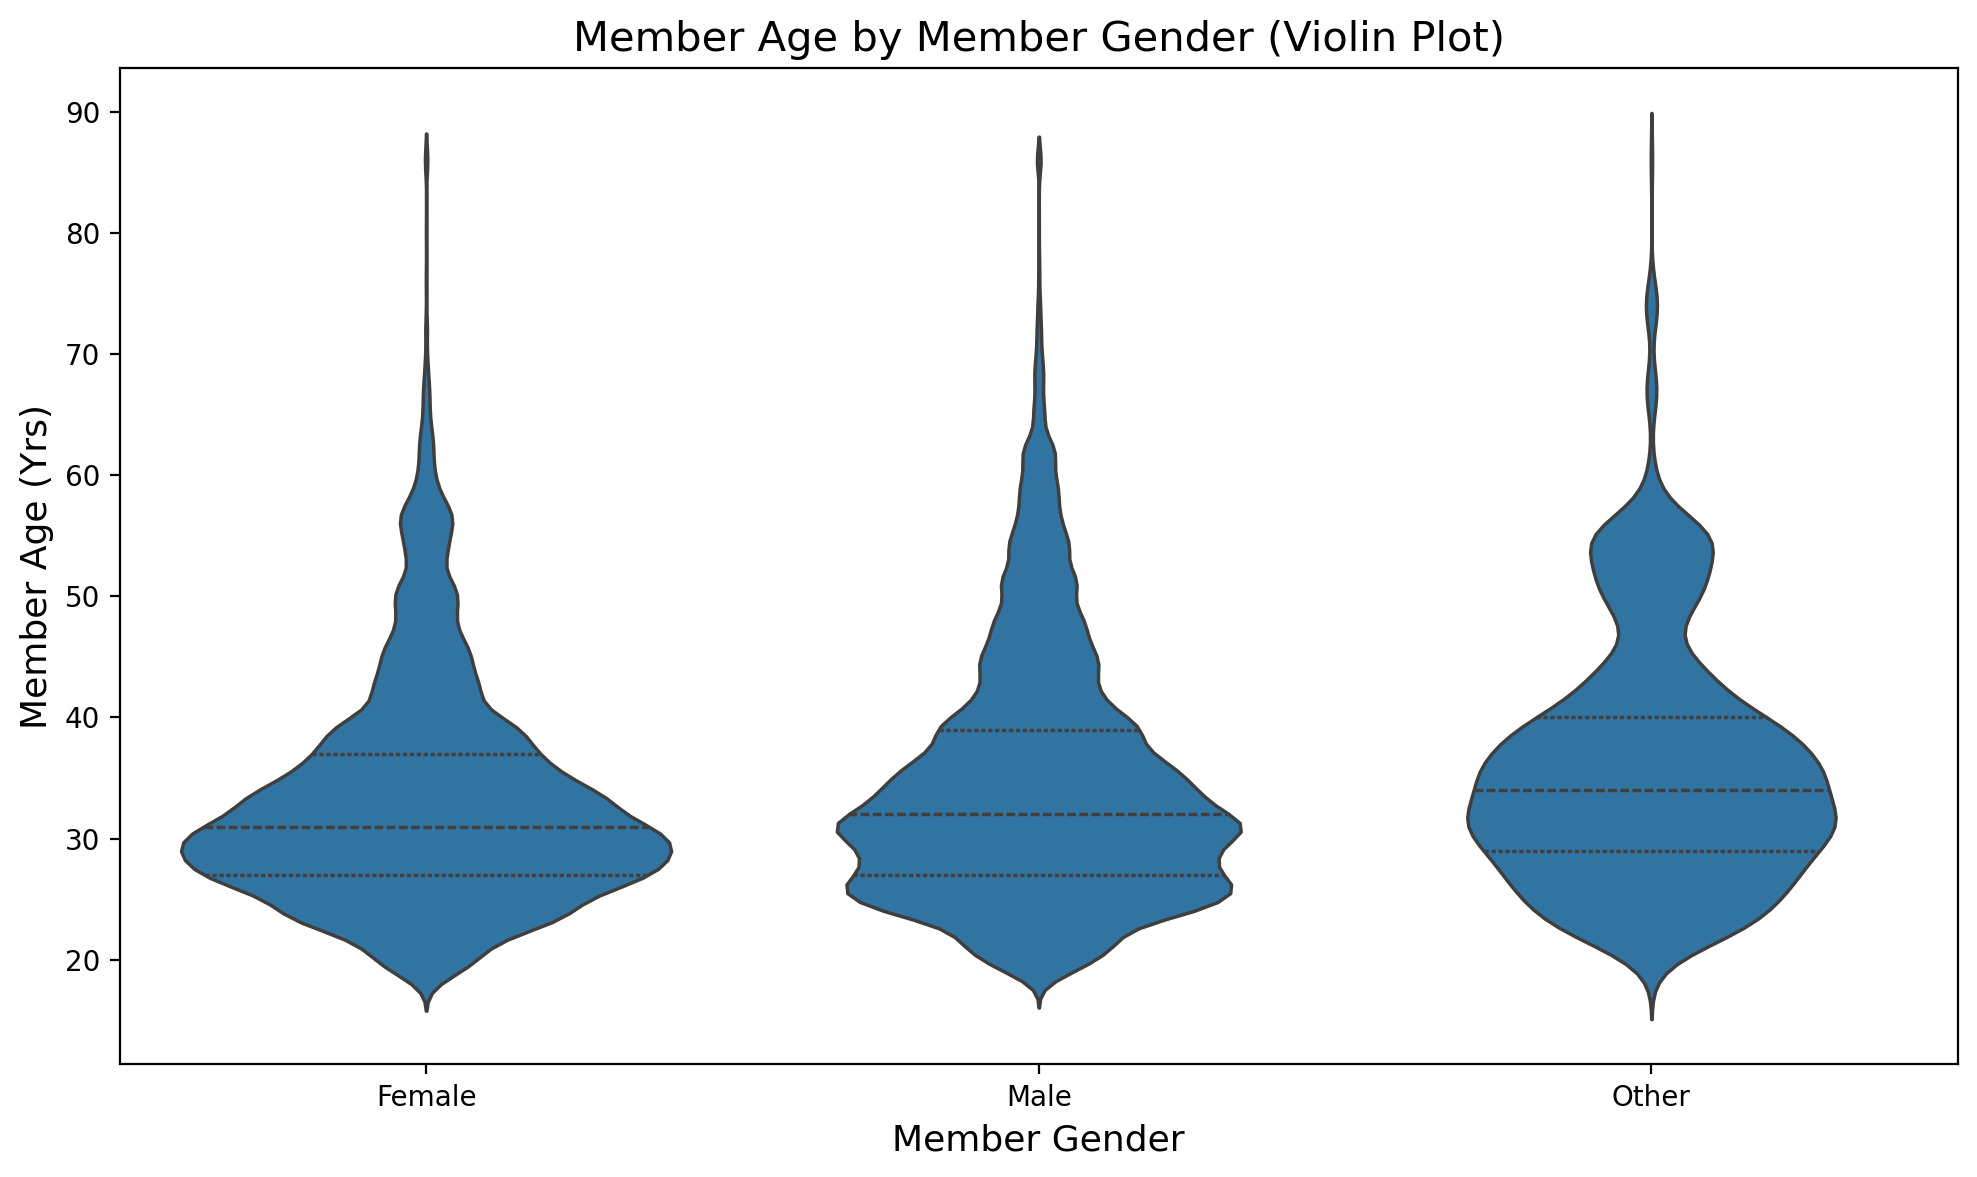

In [497]:
# Set the color palette
color = sns.color_palette()[0]

# Plotting the violin plot for member age by member gender
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=df_gobike, x='member_gender', y='member_age', inner="quartile", color=color, ax=ax)
ax.set_title('Member Age by Member Gender (Violin Plot)', fontsize=15)
ax.set_xlabel('Member Gender', fontsize=13)
ax.set_ylabel('Member Age (Yrs)', fontsize=13)

plt.tight_layout()
plt.show()

The violin plot reveals that the age distribution for both males and females has a similar central tendency, with the median age for both genders around 30 years. However, the distribution for males appears slightly broader, with more density in the younger age range atound 20-30 years. This highlights that while both genders share a similar median age, males have a larger proportion of younger users compared to females.

Moving on to analyzing trip duration, I will visualize the distribution of trip durations using a histogram to understand how long most users spend on their biking trips. This will provide insights into the most common trip durations and help identify any trends or outliers.

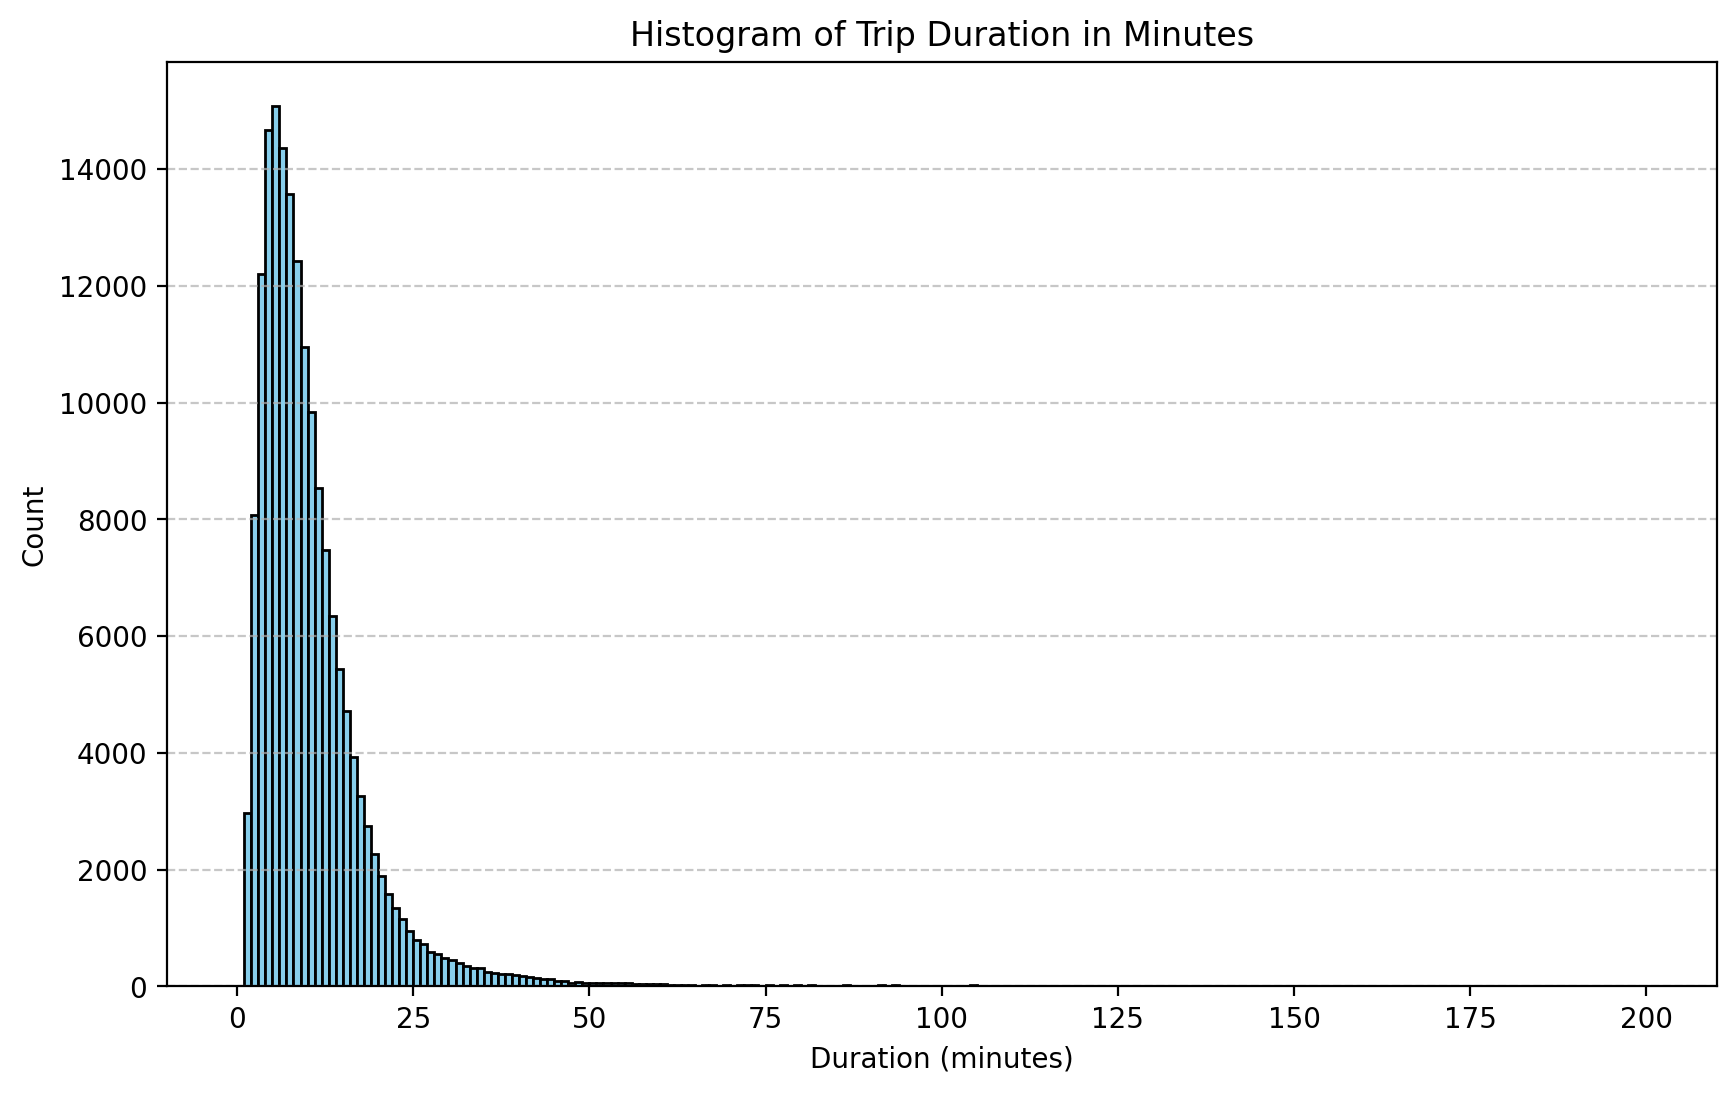

In [498]:
# Plotting the histogram for 'duration_min'
plt.figure(figsize=(10, 6))
plt.hist(df_gobike['duration_min'], bins=range(0, 201), color='skyblue', edgecolor='black')
plt.title('Histogram of Trip Duration in Minutes')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The resulting histogram shows that the majority of trips are short, with a high concentration of rides lasting between 5 to 15 minutes. This analysis highlights that most users prefer short rides, with very few rides over 50 minutes long.

Next, the average trip duration for each user type will be calculated and visualized as a column chart to understand how trip lengths vary between Subscribers and Customers. This helps identify any significant differences in riding behavior between the two user groups.

C:\Users\pccra\AppData\Local\Temp\ipykernel_50044\4278500785.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_by_user_type = df_gobike.groupby('user_type')['duration_min'].mean()


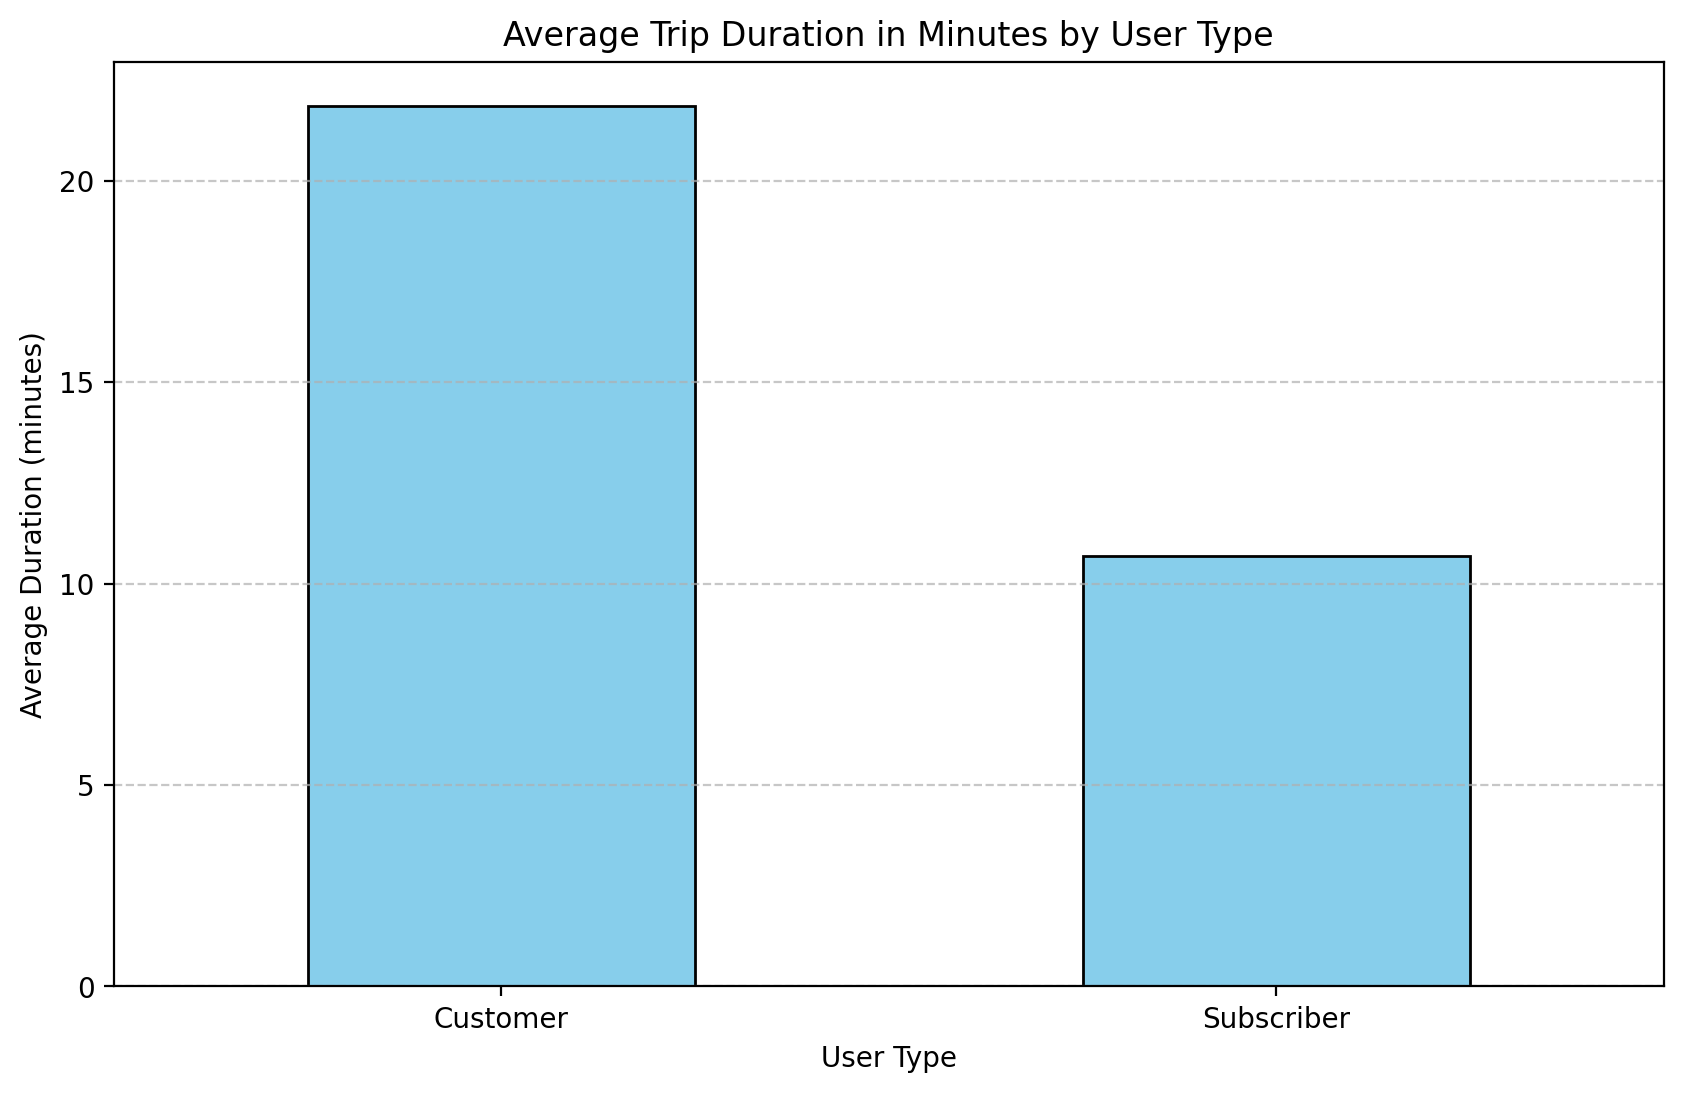

In [499]:
# Calculate the average duration of trips in minutes by user type
avg_duration_by_user_type = df_gobike.groupby('user_type')['duration_min'].mean()

# Plotting the average duration as a column chart
plt.figure(figsize=(10, 6))
avg_duration_by_user_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Trip Duration in Minutes by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The column chart shows that Customers, on average, have longer trip durations compared to Subscribers, with an average duration of just over 20 minutes for Customers and less than 11 minutes for Subscribers. This suggests that Subscribers might be using the service for regular, shorter commutes, while Customers may use it less reliably for longer recreational rides.

Next, the average trip duration for one-way and round trips will be calculated and visualized to compare the differences between these two types of rides. This visualization will provide insights into whether round trips or one-way trips tend to be longer.

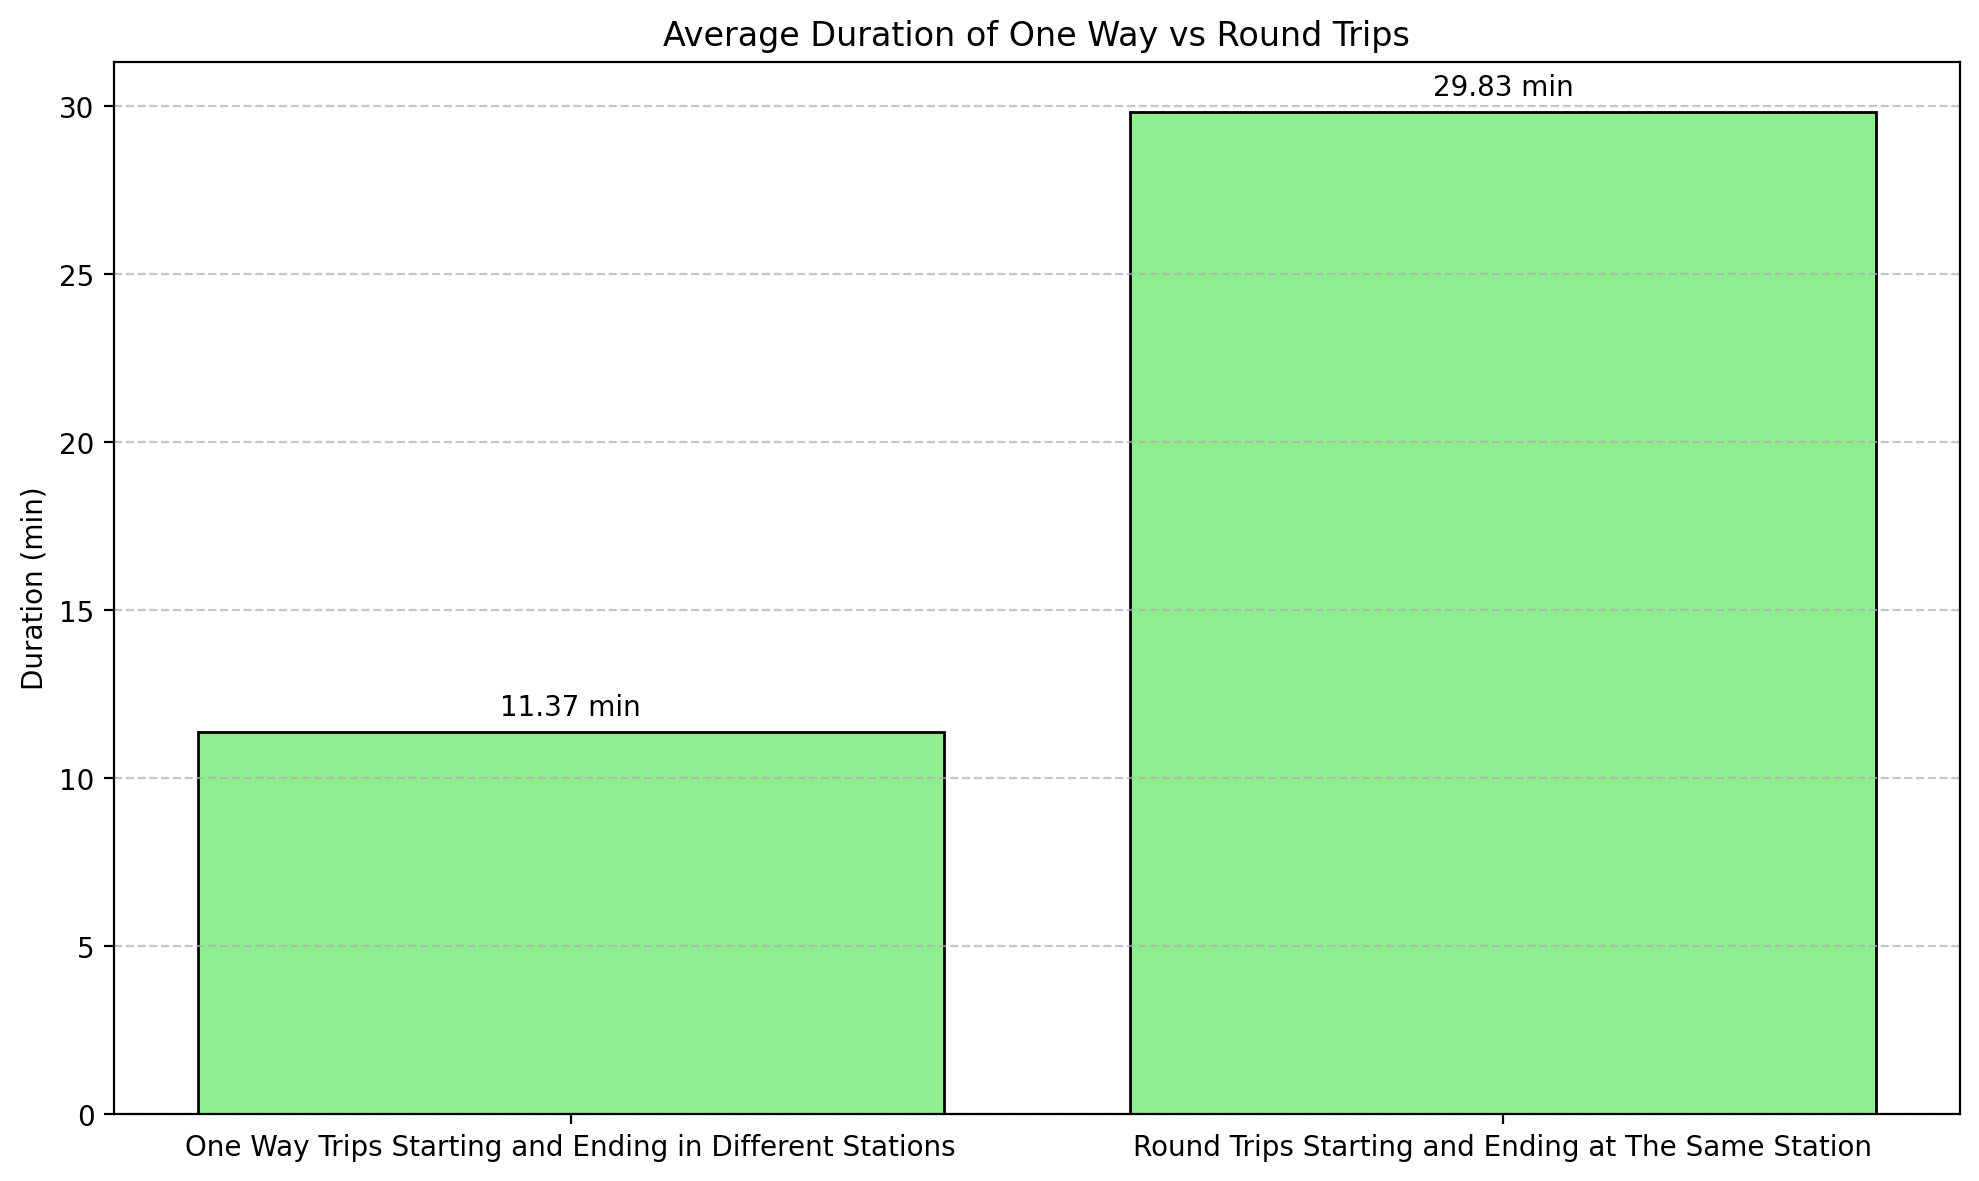

In [500]:
# Separate round trips and one-way trips
round_trips = df_gobike[df_gobike['start_coordinates'] == df_gobike['end_coordinates']]
one_way_trips = df_gobike[df_gobike['start_coordinates'] != df_gobike['end_coordinates']]

# Calculate the average duration for one-way and round trips
height = [one_way_trips['duration_min'].mean(), round_trips['duration_min'].mean()]
tick_label = ['One Way Trips Starting and Ending in Different Stations', 'Round Trips Starting and Ending at The Same Station']

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=[0, 1], height=height, tick_label=tick_label, color='lightgreen', edgecolor='black')
ax.set_ylabel('Duration (min)')
ax.set_title('Average Duration of One Way vs Round Trips')

# Adding value labels on bars
for i, v in enumerate(height):
    ax.text(i, v + 0.5, f'{v:.2f} min', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The resulting bar chart shows that round trips have a significantly longer average duration, approximately 30 minutes, compared to one-way trips, around slightly more than 11 minutes. This suggests that users who start and end at the same station may be using the bikes for recreational purposes, while one-way trips are more likely to be used for point-to-point travel, such as commuting.

Continuing this, the distribution of trip durations for one-way and round trips will be visualized using histograms to compare how the durations differ between these types of trips. This visualization will help identify patterns in trip length for each type, providing insights into typical usage.

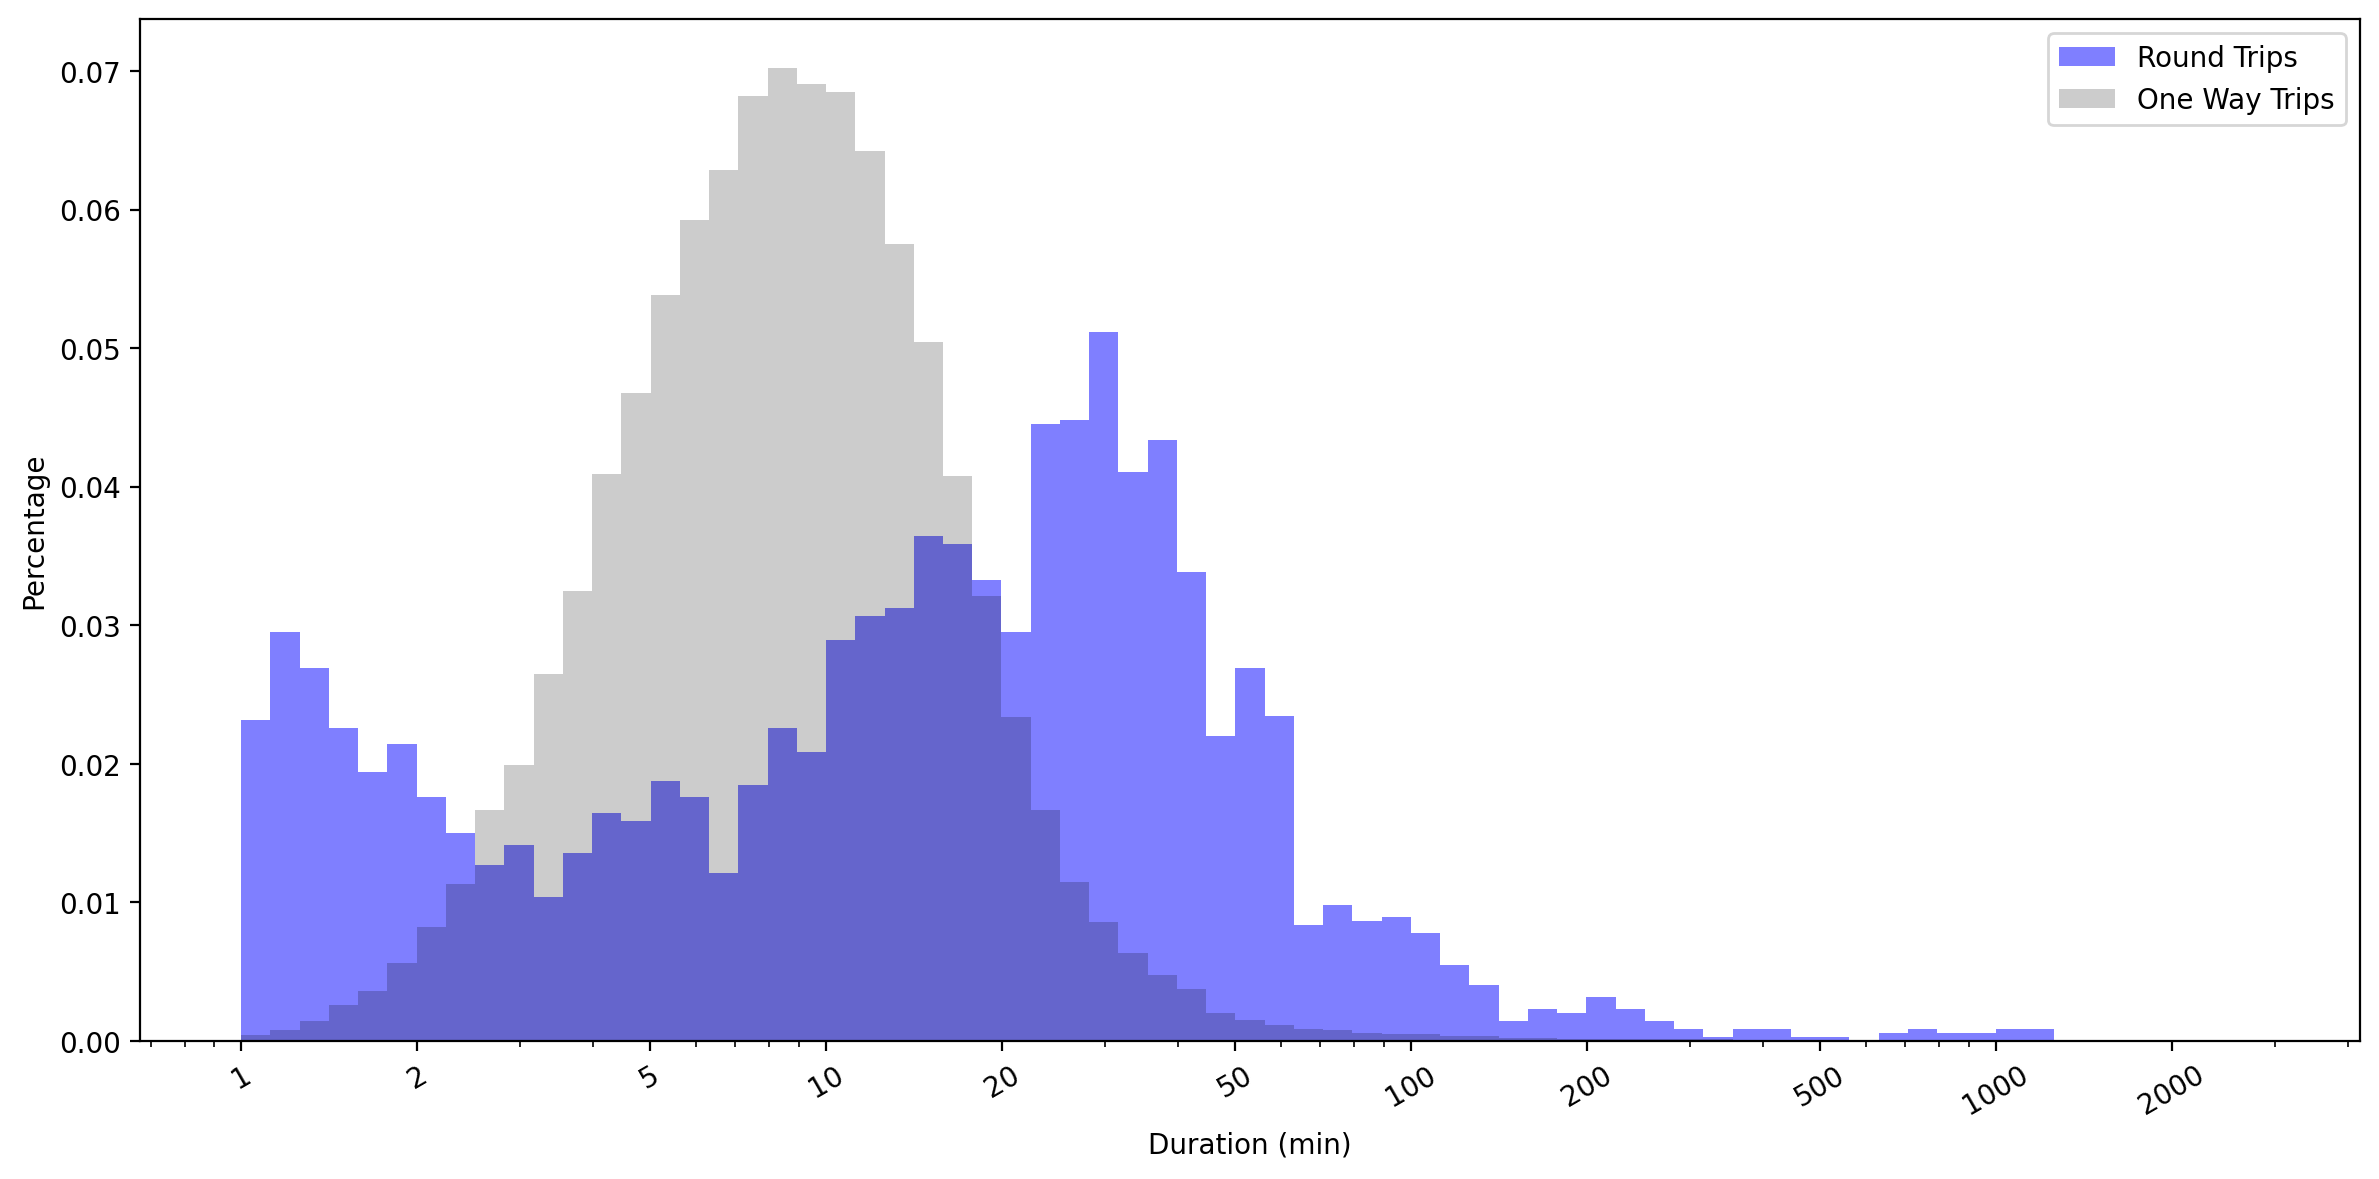

In [501]:
# Separate round trips and one-way trips
round_trips = df_gobike[df_gobike['start_coordinates'] == df_gobike['end_coordinates']]
one_way_trips = df_gobike[df_gobike['start_coordinates'] != df_gobike['end_coordinates']]

# Plotting the histogram for trip durations
fig, ax = plt.subplots(figsize=(12, 6))
bins = 10 ** np.arange(0, 3.5, 0.05)

# Plot histograms for round trips and one-way trips
ax.hist(round_trips['duration_min'], bins=bins, color='blue', weights=np.ones(len(round_trips)) / len(round_trips), alpha=0.5, label='Round Trips')
ax.hist(one_way_trips['duration_min'], bins=bins, color='black', weights=np.ones(len(one_way_trips)) / len(one_way_trips), alpha=0.2, label='One Way Trips')

ax.set_xscale('log')
ax.set_xlabel('Duration (min)')
ax.set_ylabel('Percentage')
xticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=30)
ax.legend()

plt.tight_layout()
plt.show()

The resulting histograms reveal that one-way trips tend to have shorter durations, with a significant percentage of trips lasting between 5 to 20 minutes, while round trips generally have longer durations. This indicates that one-way trips are more likely to be short and functional, whereas round trips are longer, possibly reflecting more leisurely or recreational usage.

Doing futher comparisons for ride duration by member gender using a box plot to show how the median, range, and distribution of trip durations vary across genders. This plot will help in identifying any significant differences between male and female riders in terms of how long their trips last.

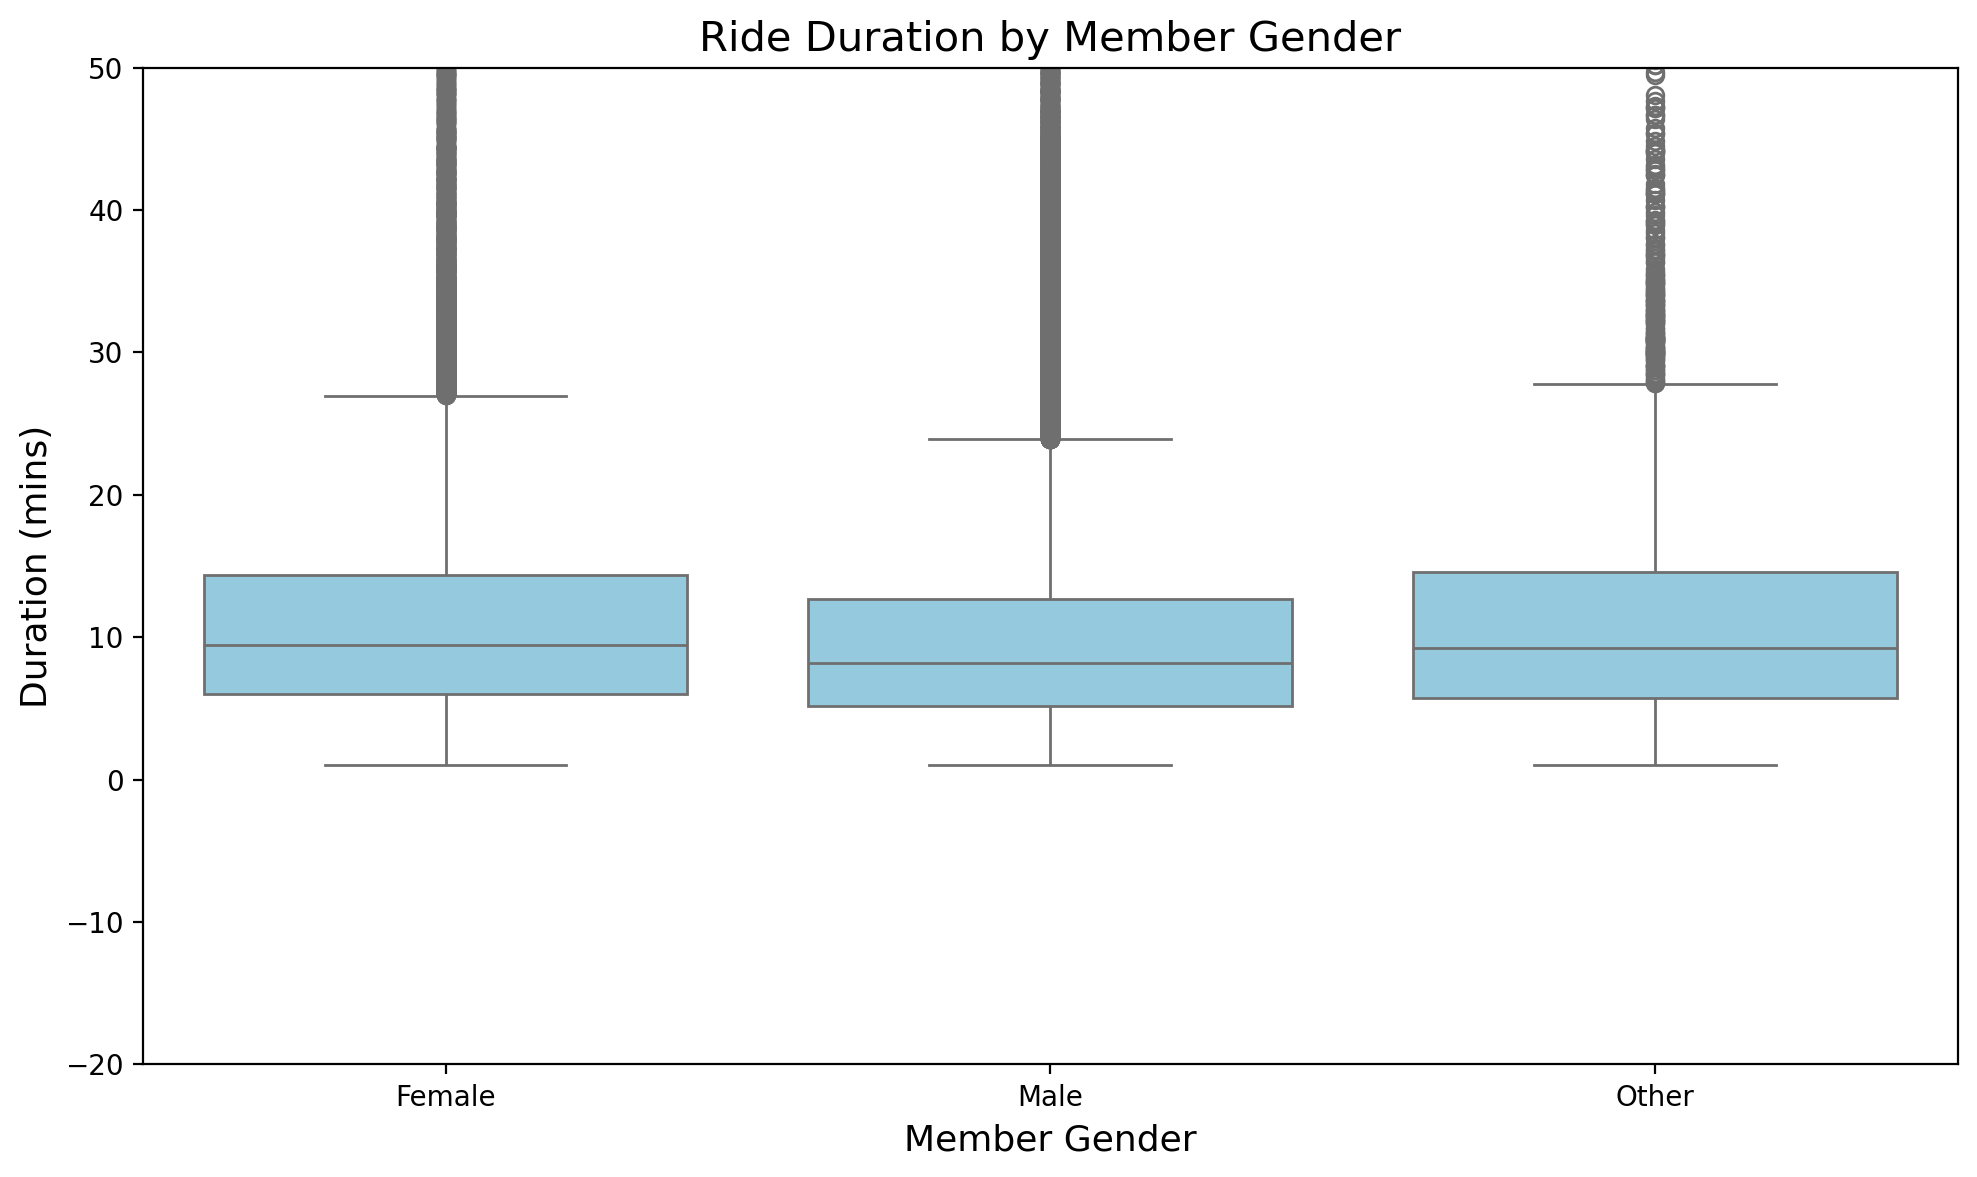

In [502]:
# Plotting the box plot for ride duration by member gender
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_gobike, x='member_gender', y='duration_min', color='skyblue', ax=ax)
ax.set_ylim(-20, 50)
ax.set_title('Ride Duration by Member Gender', fontsize=15)
ax.set_xlabel('Member Gender', fontsize=13)
ax.set_ylabel('Duration (mins)', fontsize=13)

plt.tight_layout()
plt.show()

The resulting box plot shows that the median ride duration is similar for both males and females, with most rides lasting between 5 and 20 minutes. However, there are some longer outliers for both genders. This analysis helps answer questions about ride duration patterns by gender, showing that both genders have comparable riding behaviors, with slight variations in the range of trip durations.

The relationship between rider's age and ride duration for longer trips will be visualized using a regression plot. This will help identify any patterns or correlations between age and the duration of extended trips, focusing on rides longer than 6 hours.

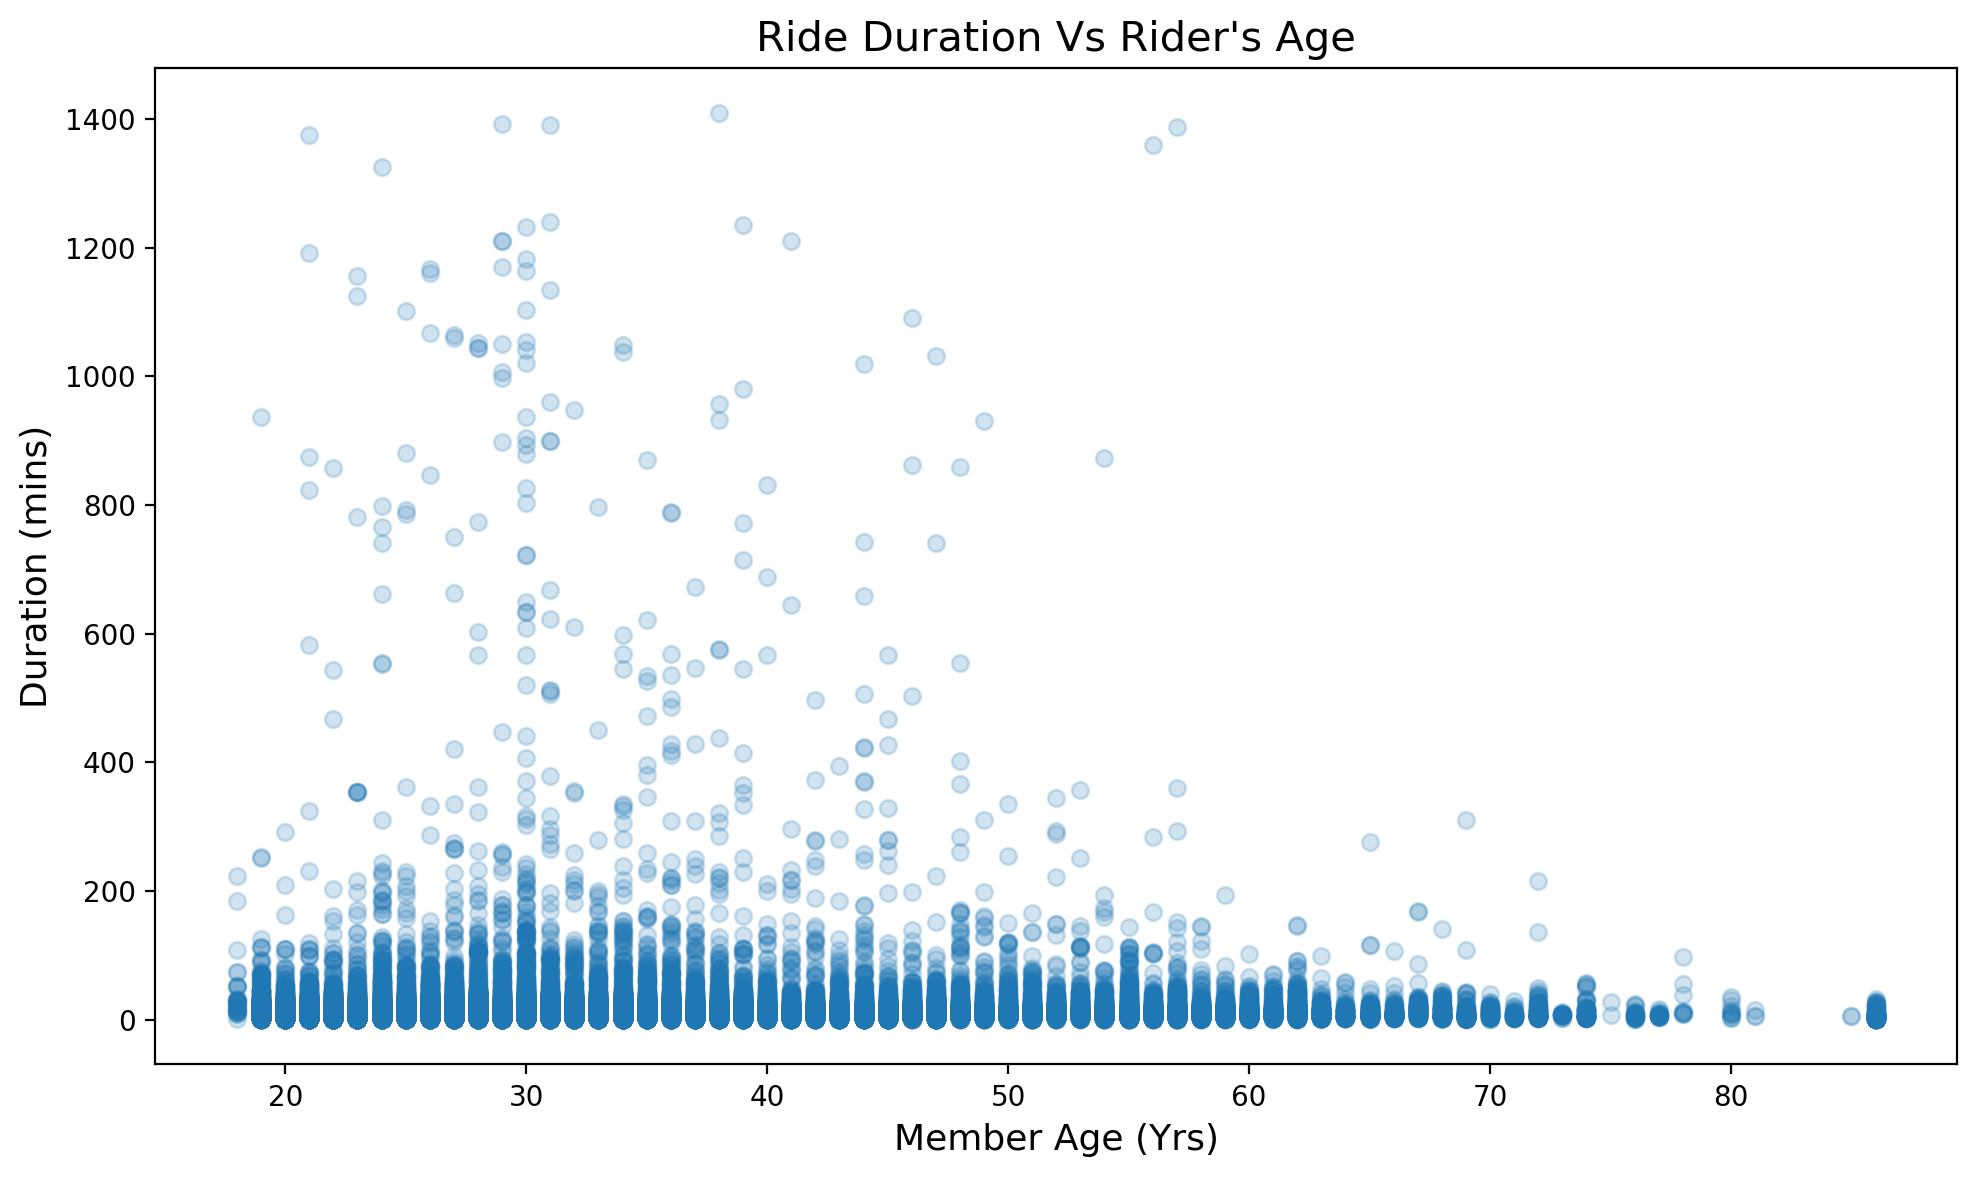

In [503]:
# Plotting the scatter plot for ride duration vs. rider's age
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data=df_gobike, x='member_age', y='duration_min', alpha=0.2)
ax.set_xlabel('Member Age (Yrs)', fontsize=13)
ax.set_ylabel('Duration (mins)', fontsize=13)
ax.set_title("Ride Duration Vs Rider's Age", fontsize=15)

plt.tight_layout()
plt.show()

The resulting regression plot indicates that there is not a strong correlation between rider age and ride duration for these longer trips, with ride durations being fairly scattered across all age groups. This suggests that longer trips are not significantly influenced by the rider's age, implying that people of all ages are equally likely to take longer rides.

The relationship between rider's age and ride duration for longer trips will be visualized using a regression plot to identify any patterns between age and long ride durations. This will help determine if there is a correlation between older or younger riders and their likelihood of taking extended trips.

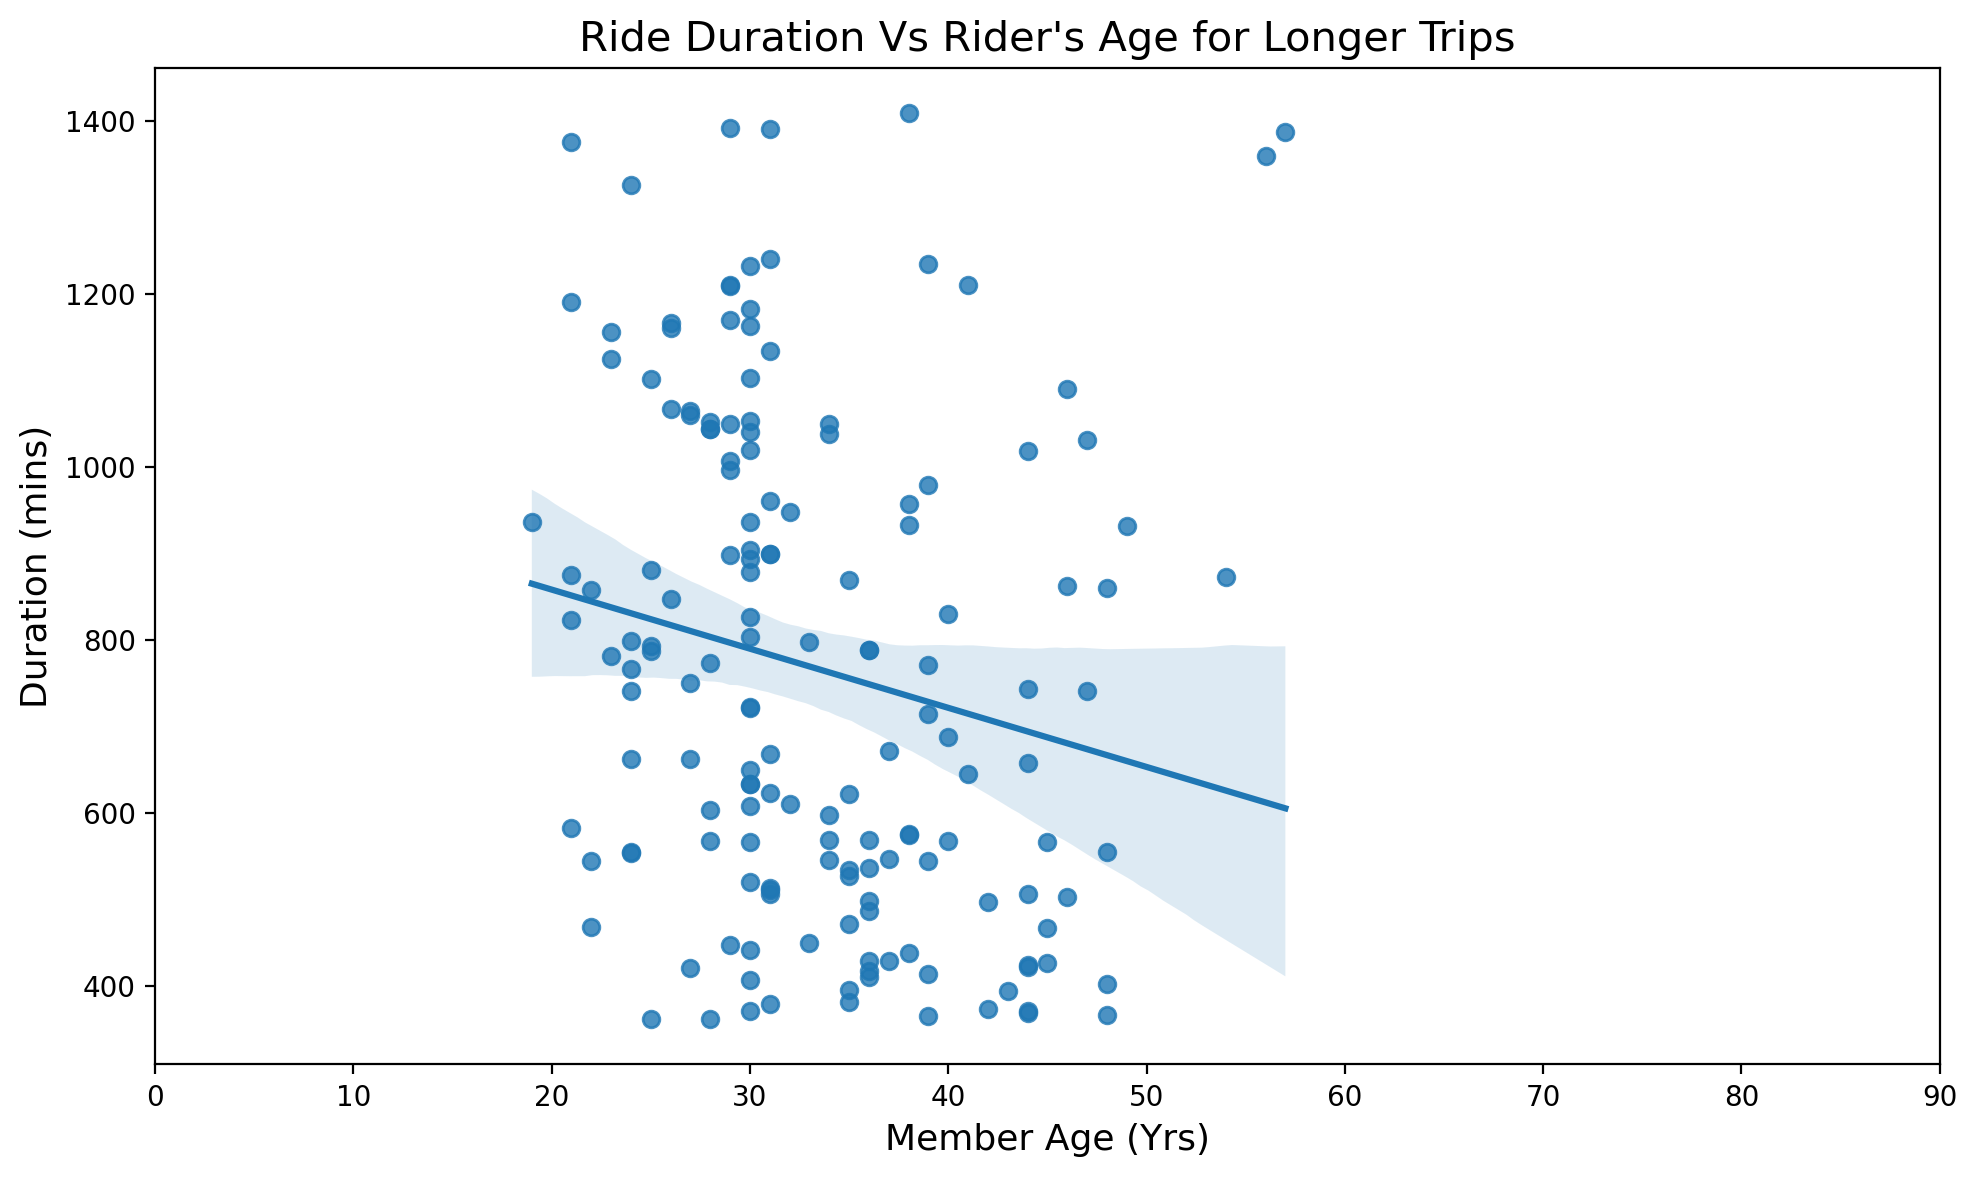

In [504]:
# Plotting the regression plot for ride duration vs. rider's age for longer trips
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(data=df_gobike.query('duration_min > 360'), x='member_age', y='duration_min', ax=ax)
ax.set_xlim(0, 90)
ax.set_title("Ride Duration Vs Rider's Age for Longer Trips", fontsize=15)
ax.set_xlabel('Member Age (Yrs)', fontsize=13)
ax.set_ylabel('Duration (mins)', fontsize=13)

plt.tight_layout()
plt.show()

The regression plot shows that there is no strong correlation between rider age and ride duration for longer trips, as data points are scattered across all age groups. This suggests that individuals of different ages are equally likely to take longer rides, indicating that longer trips are not limited to any specific age demographic.

The day of the week will be extracted from the ride start time to analyze ride activity patterns throughout the week. This will provide insights into which days have the highest and lowest number of rides, helping understand user behavior.

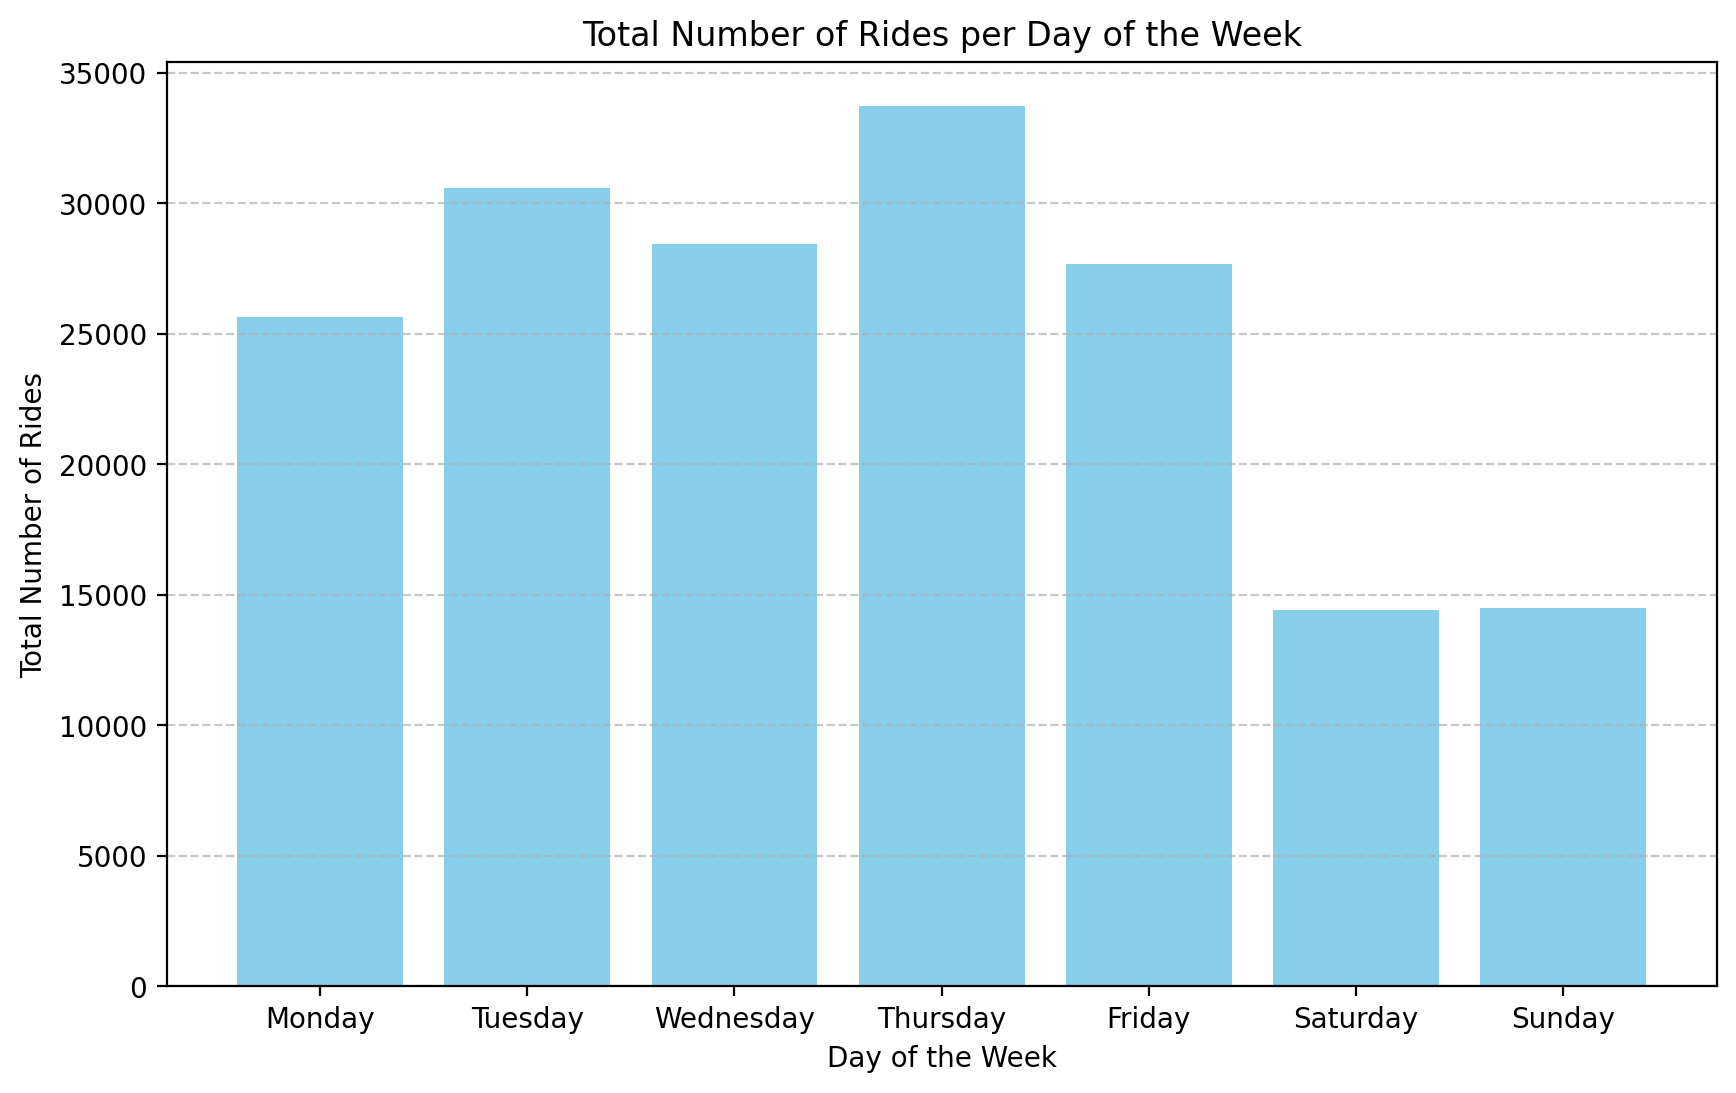

In [505]:
# Convert 'start_time' to datetime format and extract day of the week
df_gobike['day_of_week'] = df_gobike['start_time'].dt.day_name()

# Calculate total number of rides per day of the week using 'bike_id'
total_rides = df_gobike.groupby('day_of_week')['bike_id'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the total number of rides per day of the week
plt.figure(figsize=(10, 6))
plt.bar(total_rides.index, total_rides.values, color='skyblue')
plt.title('Total Number of Rides per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Rides')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The resulting bar chart shows that weekdays like Tuesday and Wednesday tend to have a higher number of rides compared to weekends, which suggests that many users may be using the bike-sharing service for commuting purposes during the workweek. However, there is also notable activity during the weekends, indicating mixed use for both commuting and leisure.

The percentage of user types for each start day of the week will be visualized to identify patterns in bike usage across weekdays and weekends. This will provide insights into how different user types (e.g., Subscribers and Customers) engage with the service throughout the week.

C:\Users\pccra\AppData\Local\Temp\ipykernel_50044\1962254039.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_type_percentage_by_day = df_gobike.groupby(['day_of_week', 'user_type']).size().reset_index(name='count')


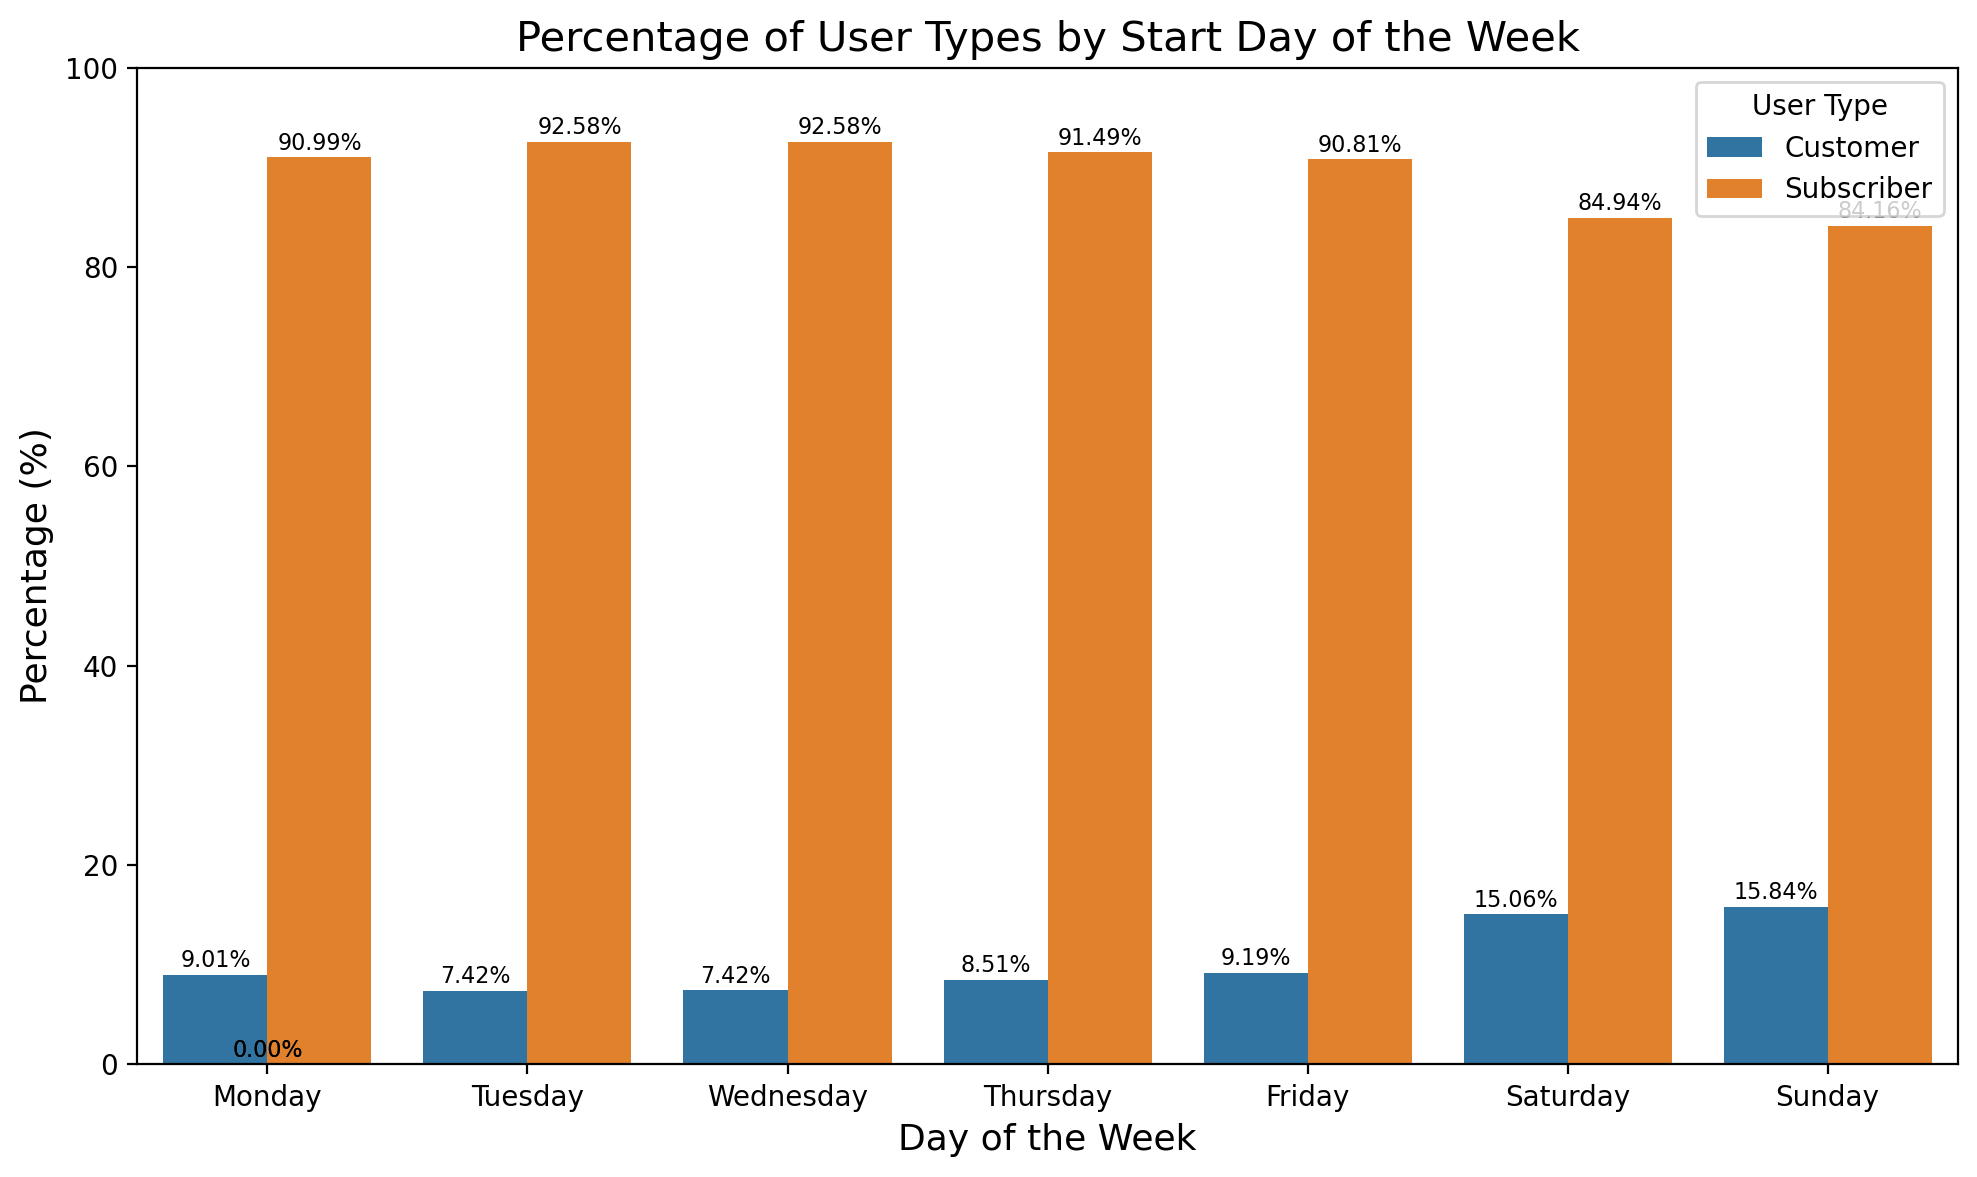

In [506]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the percentage of user types by start day of the week
user_type_percentage_by_day = df_gobike.groupby(['day_of_week', 'user_type']).size().reset_index(name='count')
user_type_percentage_by_day['percentage'] = (user_type_percentage_by_day['count'] / user_type_percentage_by_day.groupby('day_of_week')['count'].transform('sum')) * 100

# Plotting the percentage of user types by start day of the week
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=user_type_percentage_by_day, x='day_of_week', y='percentage', hue='user_type', order=days_order, ax=ax)
ax.set_ylabel('Percentage (%)', fontsize=13)
ax.set_xlabel('Day of the Week', fontsize=13)
ax.set_ylim(0, 100)
ax.set_title('Percentage of User Types by Start Day of the Week', fontsize=15)

# Adding value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

ax.legend(title='User Type', loc='upper right')
plt.tight_layout()
plt.show()

The resulting bar chart reveals that Subscribers are the dominant user type throughout the week, with a higher percentage on weekdays. Customers, on the other hand, have a slightly larger representation on weekends, suggesting that Customers may prefer leisure rides during weekends, whereas Subscribers use the service more consistently for commuting during the workweek.

Lastly, I will use a facet plot to visualize the average trip duration for different user types (Subscribers and Customers) across various age groups. This plot will help identify if there are significant differences in trip duration between age groups and how these vary between Subscribers and Customers.

C:\Users\pccra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\pccra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


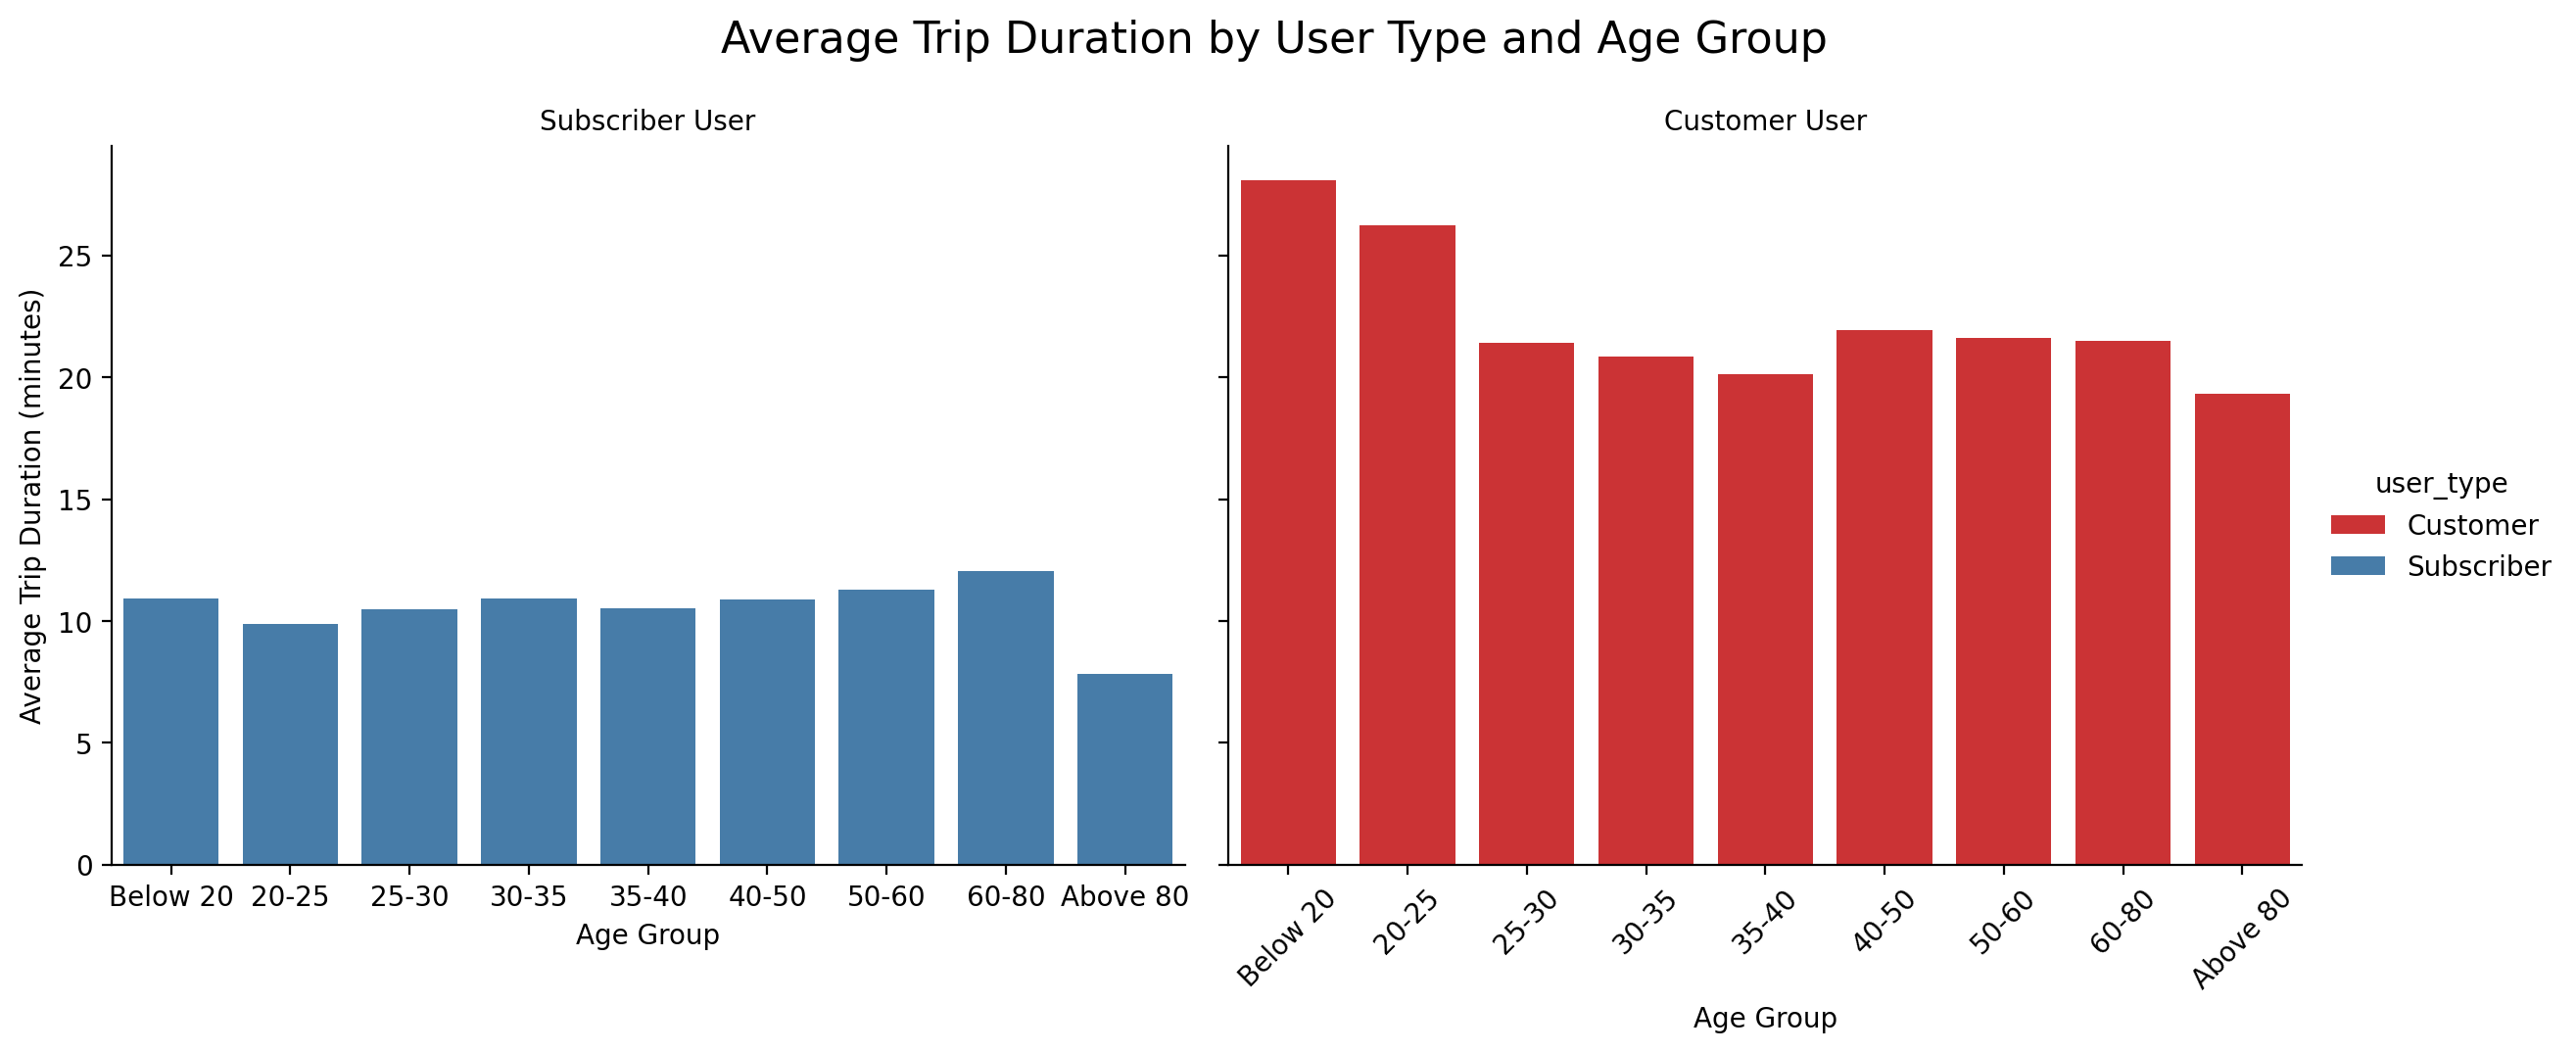

In [507]:
# Define the order of age groups for consistent plotting
age_group_order = ["Below 20", "20-25", "25-30", "30-35", "35-40", "40-50", "50-60", "60-80", "Above 80"]

# Create a facet grid to visualize average trip duration by user type and age group
g = sns.FacetGrid(df_gobike, col='user_type', hue='user_type', palette='Set1', height=5, aspect=1.2, col_order=['Subscriber', 'Customer'])
g.map(sns.barplot, 'age_group', 'duration_min', order=age_group_order, ci=None)
g.add_legend()

# Set axis labels and titles
g.set_axis_labels('Age Group', 'Average Trip Duration (minutes)')
g.set_titles(col_template='{col_name} User')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Average Trip Duration by User Type and Age Group', fontsize=16)
plt.xticks(rotation=45)
plt.show()

The facet plot shows that Customers generally have longer average trip durations compared to Subscribers across most age groups. Notably, the age group "20-25" has the highest average trip duration for Customers at around 25 minutes, whereas for Subscribers, trip durations are more consistent across age groups, typically around 12-15 minutes. This suggests that younger Customers tend to take longer, perhaps more recreational trips, while Subscribers use the service more consistently, possibly for commuting.